In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle_telco
import explore

from sklearn.model_selection import train_test_split

import sklearn.preprocessing

In [2]:
df = wrangle_telco.get_telco_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
train, validate, test = explore.split_data(df, stratify_by="monthly_charges")

## 1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [5]:
def plot_variable_pairs(df):
    sns.pairplot(train, kind="reg")

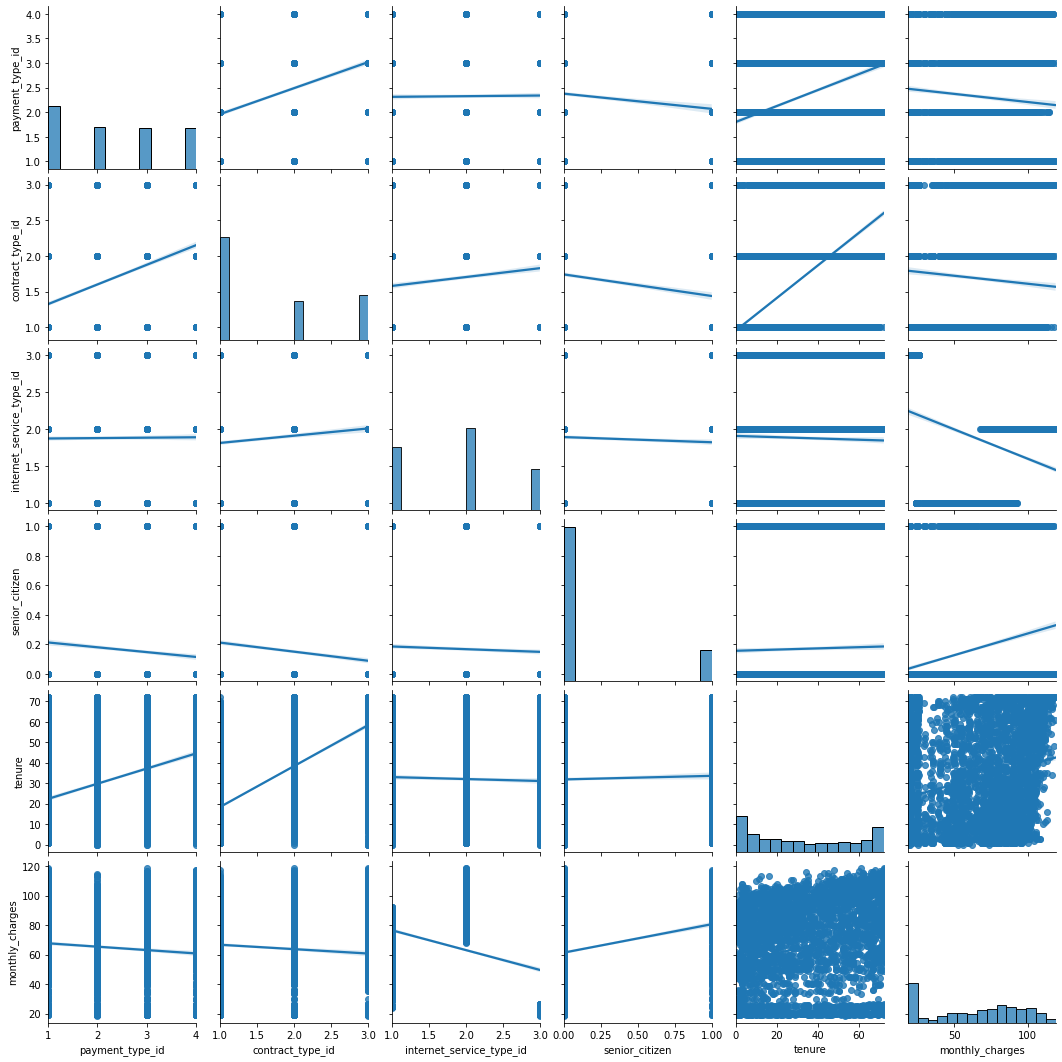

In [6]:
plot_variable_pairs(train)

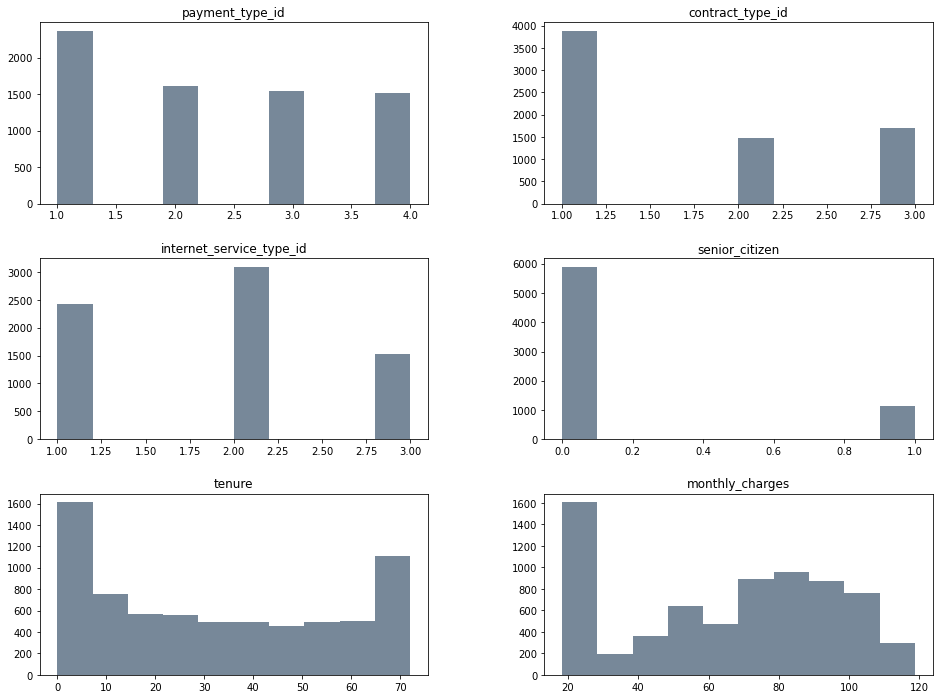

In [7]:
df.hist(grid=False, figsize=(16,12), color='lightslategrey');

## 2. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature `tenure_years`, in complete years as a customer.

In [5]:
df = explore.months_to_years(df)
df.head()

payment_type_id  contract_type_id  internet_service_type_id customer_id  \
0                2                 1                         3  0030-FNXPP   
1                2                 1                         3  0031-PVLZI   
2                1                 1                         3  0098-BOWSO   
3                1                 1                         3  0107-WESLM   
4                3                 1                         3  0114-RSRRW   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0      No         No       3           Yes  ...   
1  Female               0     Yes        Yes       4           Yes  ...   
2    Male               0      No         No      27           Yes  ...   
3    Male               0      No         No       1           Yes  ...   
4  Female               0     Yes         No      10           Yes  ...   

          streaming_tv     streaming_movies paperless_billing monthly_charges  \
0  No internet service  No internet service                No           19.85   
1  No internet service  No internet service                No           20.35   
2  No internet service  No internet service               Yes           19.40   
3  No internet service  No internet service               Yes           19.85   
4  No internet service  No internet service               Yes           19.95   

  total_charges churn internet_service_type   contract_type  \
0          57.2    No                  None  Month-to-month   
1         76.35   Yes                  None  Month-to-month   
2         529.8    No                  None  Month-to-month   
3         19.85   Yes                  None  Month-to-month   
4        187.75    No                  None  Month-to-month   

                payment_type tenure_years  
0               Mailed check            0  
1               Mailed check            0  
2           Electronic check            2  
3           Electronic check            0  
4  Bank transfer (automatic)            0  

[5 rows x 25 columns]

## 3. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [28]:
train

payment_type_id  contract_type_id  internet_service_type_id customer_id  \
4604                4                 2                         2  6655-LHBYW   
5566                3                 3                         3  3308-DGHKL   
6204                3                 3                         2  5286-YHCVC   
5837                1                 3                         3  7643-RCHXS   
1276                1                 1                         2  3473-XIIIT   
...               ...               ...                       ...         ...   
1794                1                 1                         2  5857-TYBCJ   
817                 1                 1                         2  1415-YFWLT   
901                 3                 1                         2  1867-TJHTS   
1987                1                 1                         2  6719-OXYBR   
6958                3                 3                         1  8630-QSGXK   

      gender  senior_citizen partner dependents  tenure phone_service  ...  \
4604    Male               0      No         No      50           Yes  ...   
5566    Male               0      No         No      69           Yes  ...   
6204    Male               0     Yes         No      72           Yes  ...   
5837  Female               0     Yes        Yes      63           Yes  ...   
1276  Female               0     Yes         No      16           Yes  ...   
...      ...             ...     ...        ...     ...           ...  ...   
1794    Male               1     Yes         No      44           Yes  ...   
817   Female               1      No         No       1           Yes  ...   
901   Female               0      No         No      58           Yes  ...   
1987    Male               0      No         No      15           Yes  ...   
6958    Male               0     Yes         No      51           Yes  ...   

             tech_support         streaming_tv     streaming_movies  \
4604                  Yes                  Yes                  Yes   
5566  No internet service  No internet service  No internet service   
6204                   No                  Yes                  Yes   
5837  No internet service  No internet service  No internet service   
1276                   No                  Yes                  Yes   
...                   ...                  ...                  ...   
1794                   No                  Yes                   No   
817                    No                  Yes                  Yes   
901                    No                   No                   No   
1987                   No                  Yes                   No   
6958                  Yes                  Yes                  Yes   

     paperless_billing monthly_charges total_charges churn  \
4604                No          114.35        5791.1    No   
5566               Yes           19.30        1447.9    No   
6204               Yes          104.80        7470.1    No   
5837                No           19.35       1263.85    No   
1276               Yes          100.00       1534.75   Yes   
...                ...             ...           ...   ...   
1794               Yes           89.20        4040.2    No   
817                Yes           89.30          89.3   Yes   
901                Yes           79.80       4526.85    No   
1987                No           85.30       1219.85    No   
6958               Yes           75.20       3901.25    No   

     internet_service_type   contract_type               payment_type  
4604           Fiber optic        One year    Credit card (automatic)  
5566                  None        Two year  Bank transfer (automatic)  
6204           Fiber optic        Two year  Bank transfer (automatic)  
5837                  None        Two year           Electronic check  
1276           Fiber optic  Month-to-month           Electronic check  
...                    ...             ...                        

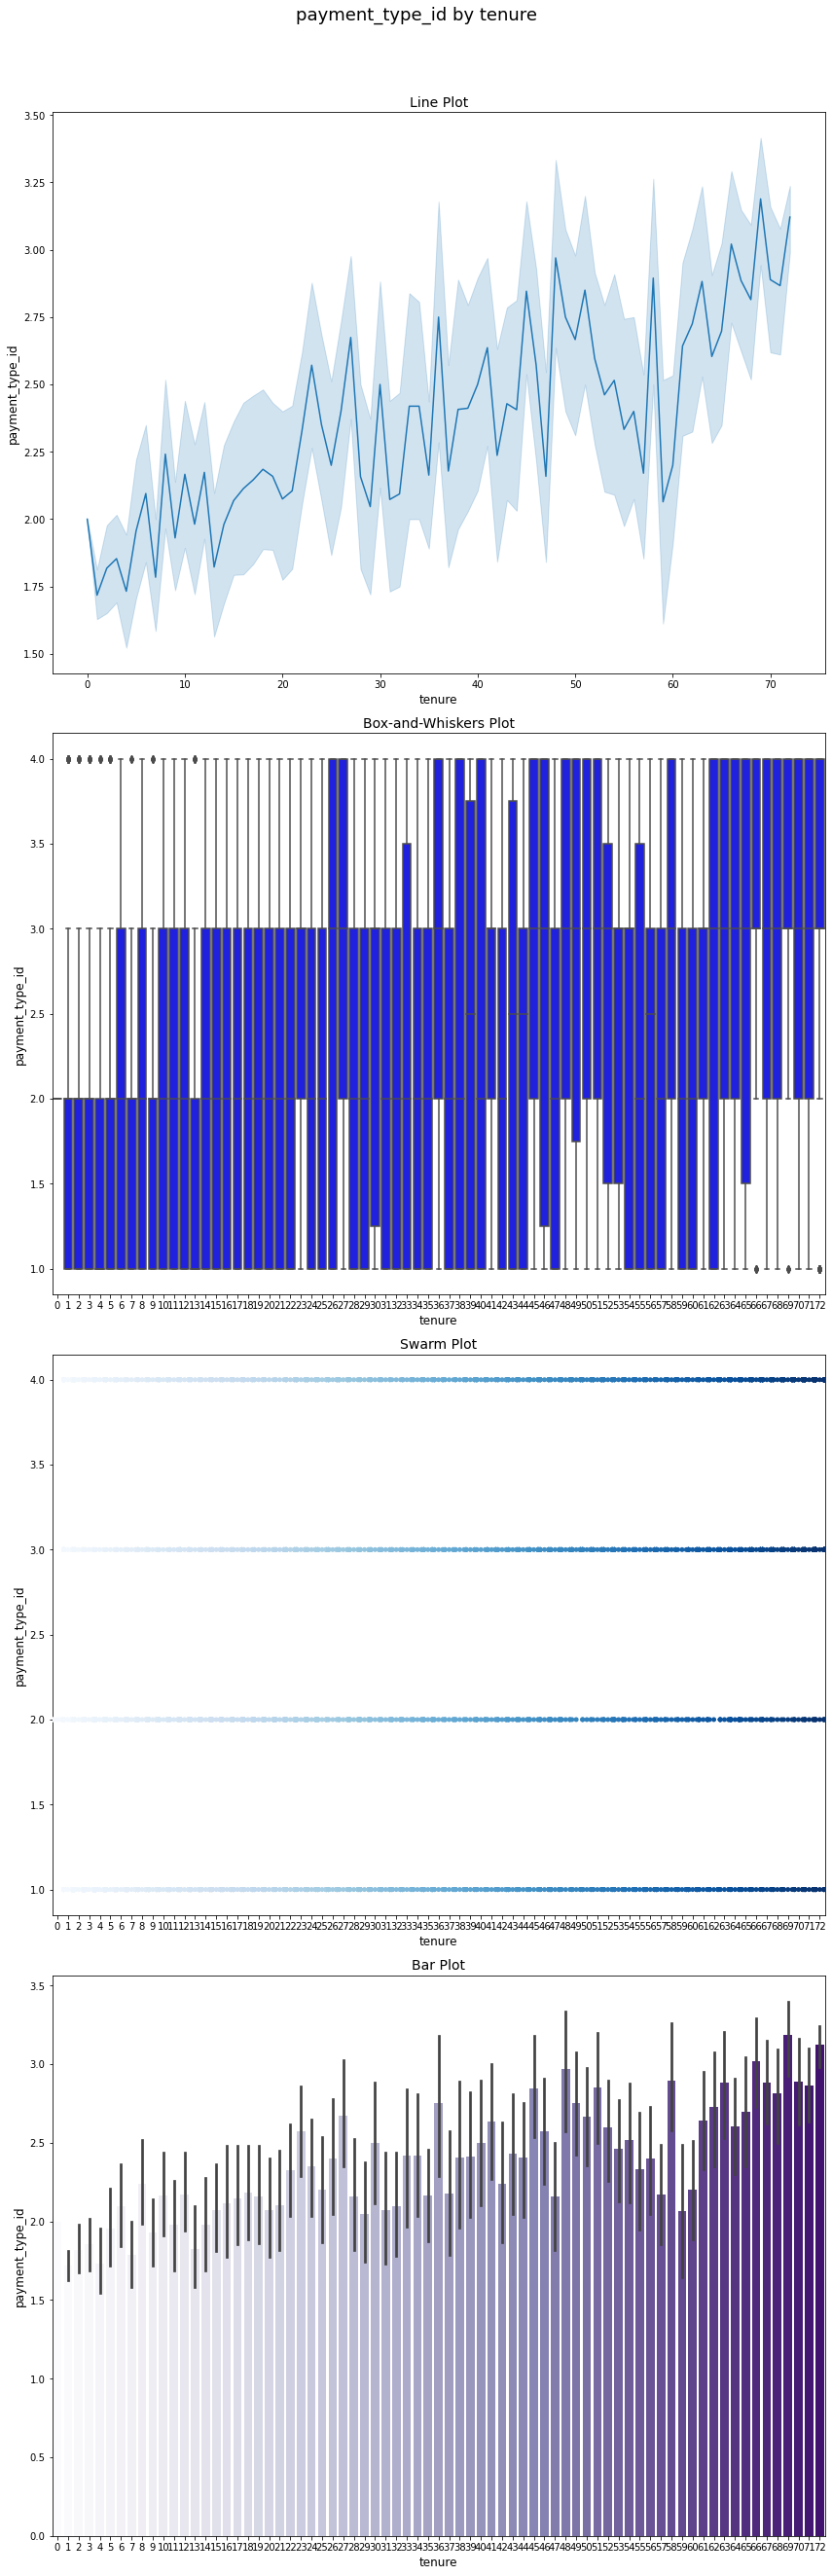

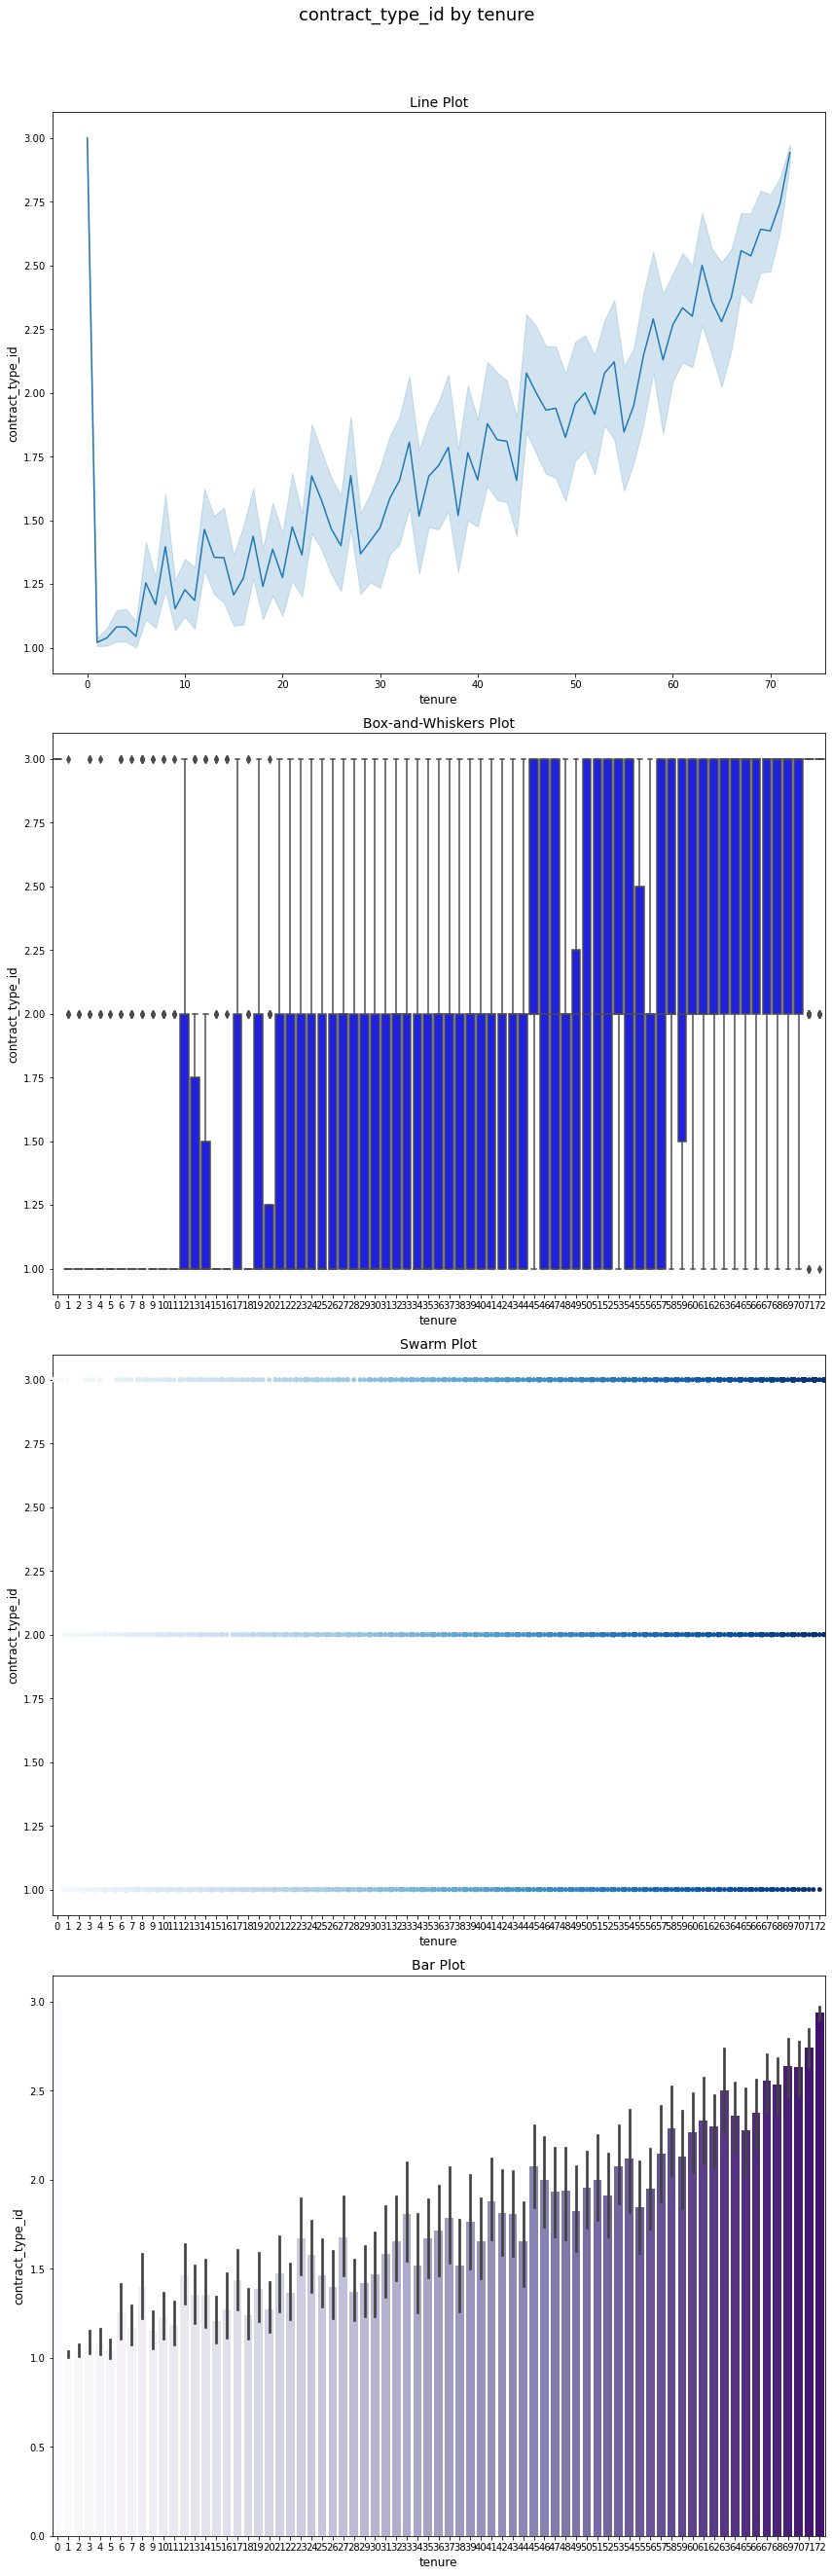

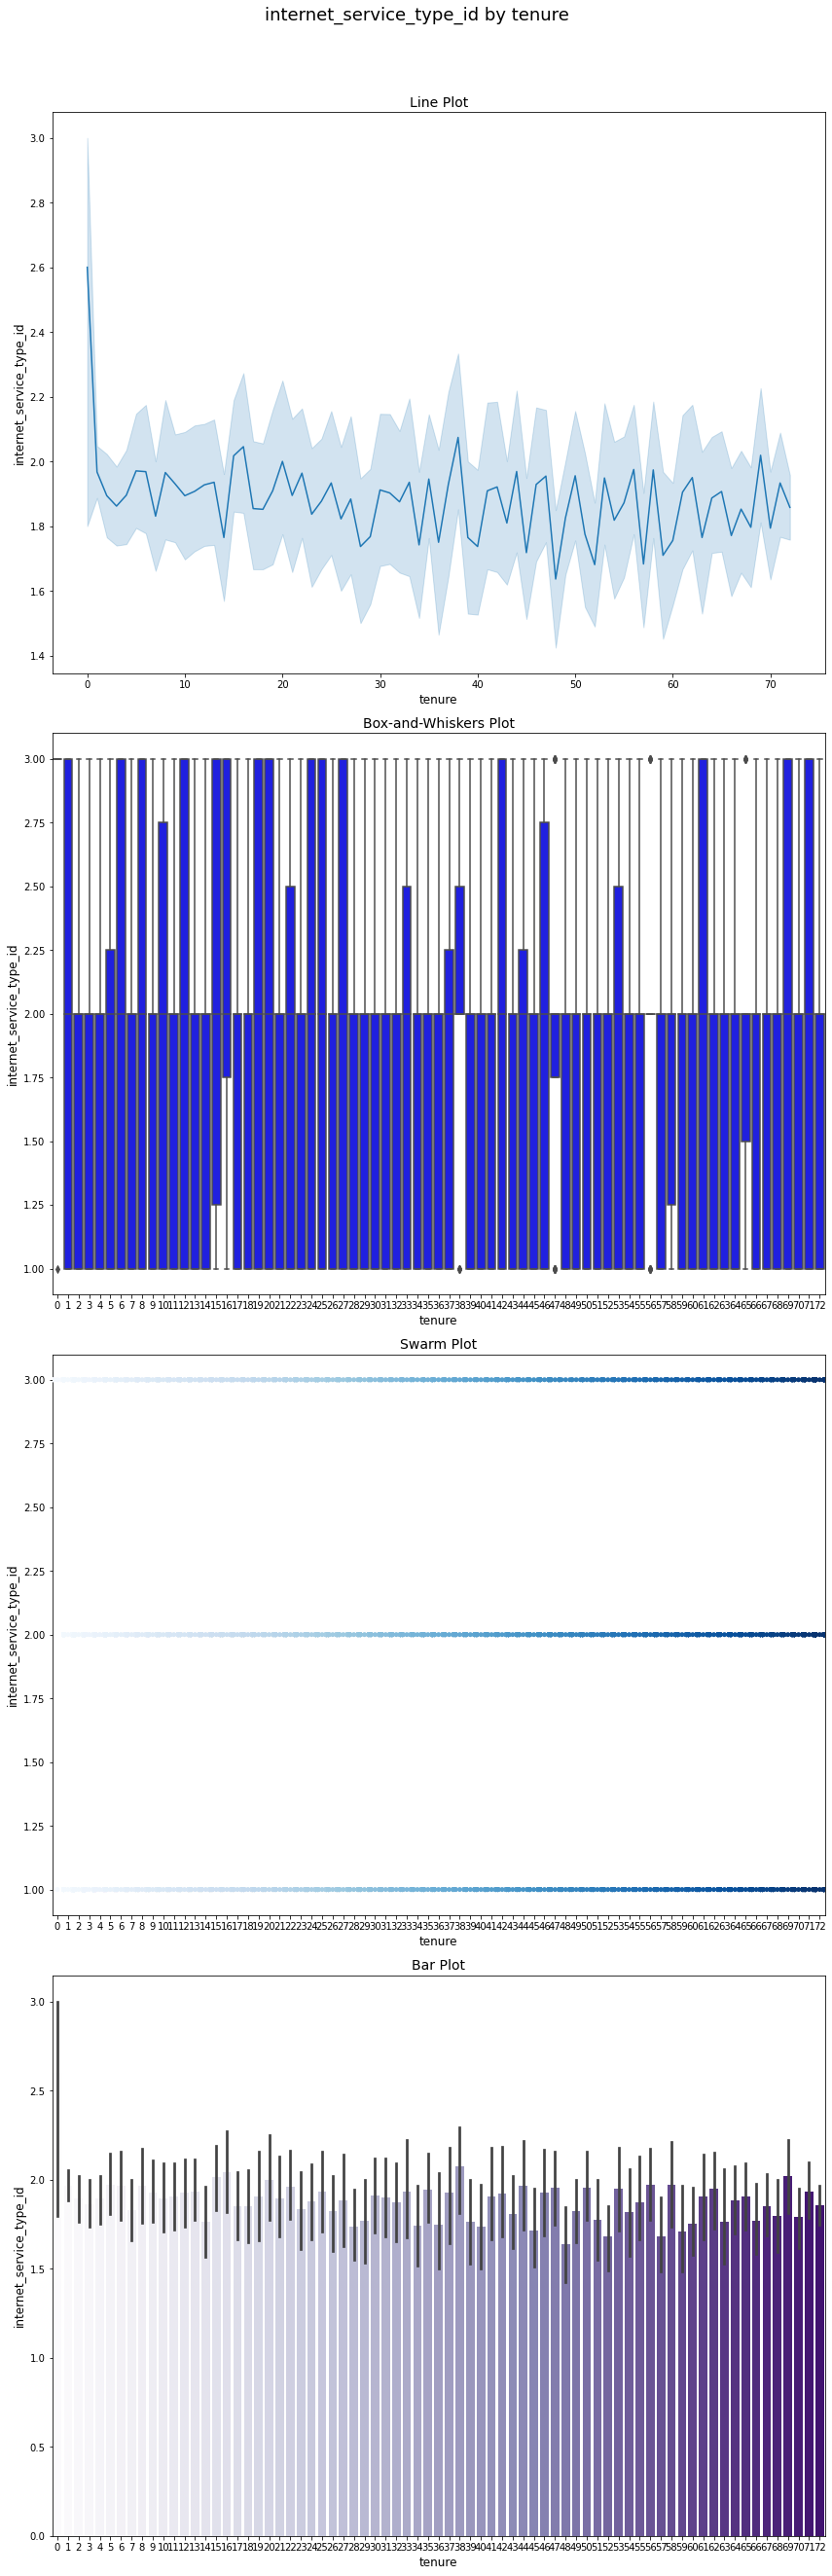

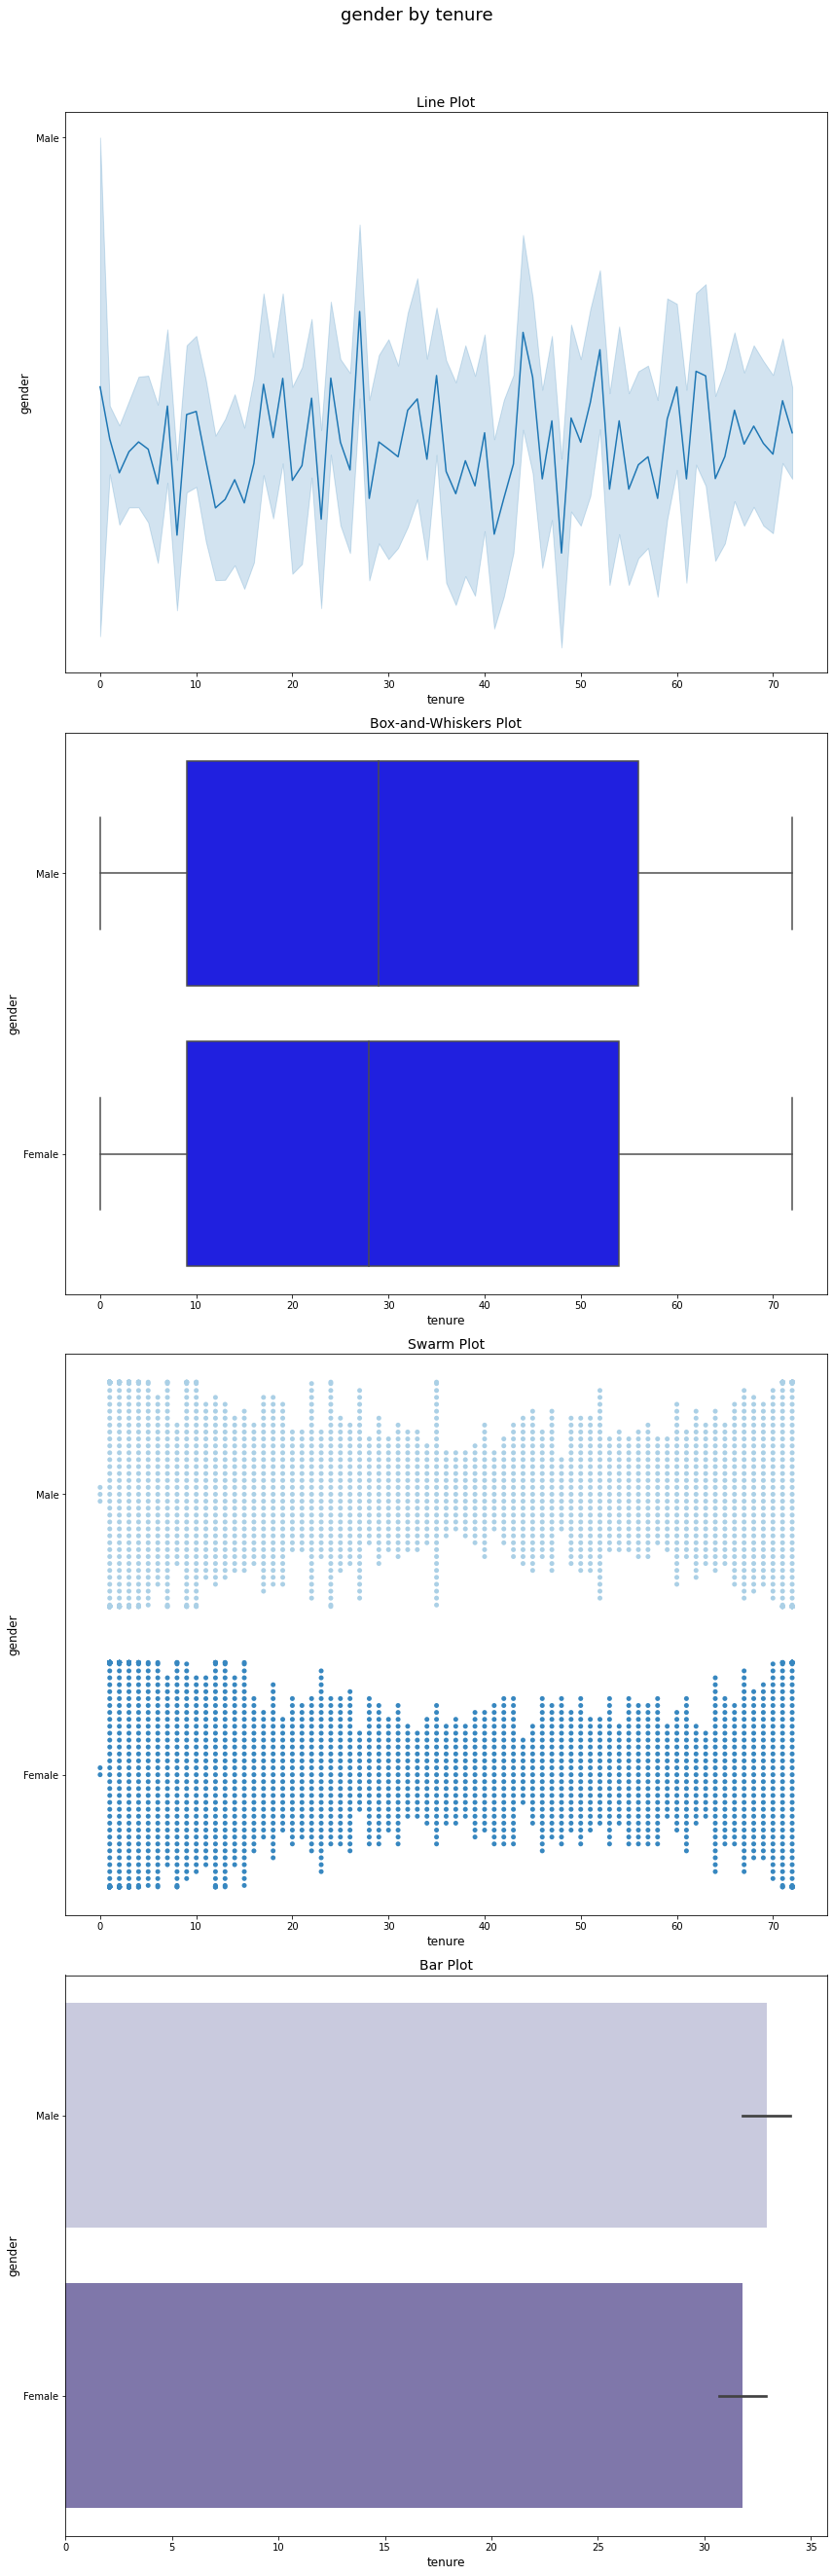

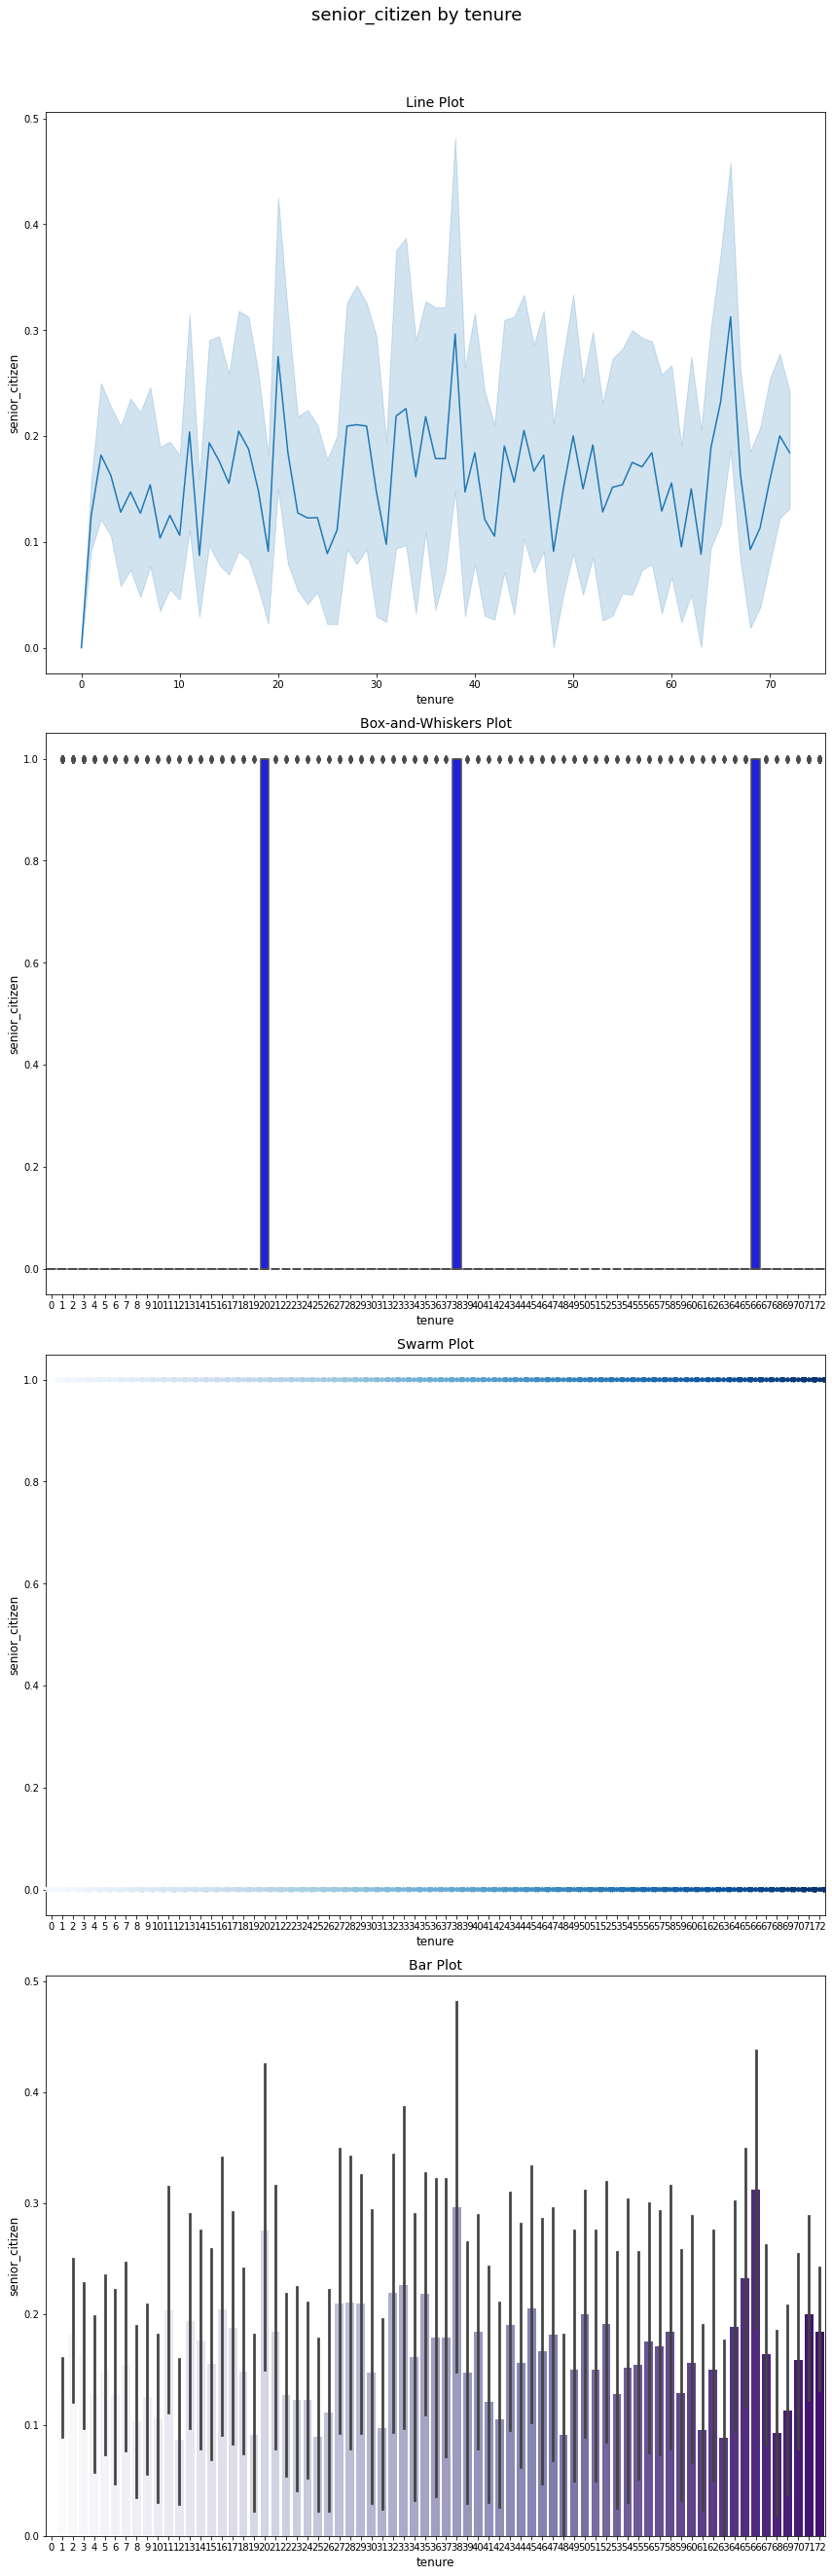

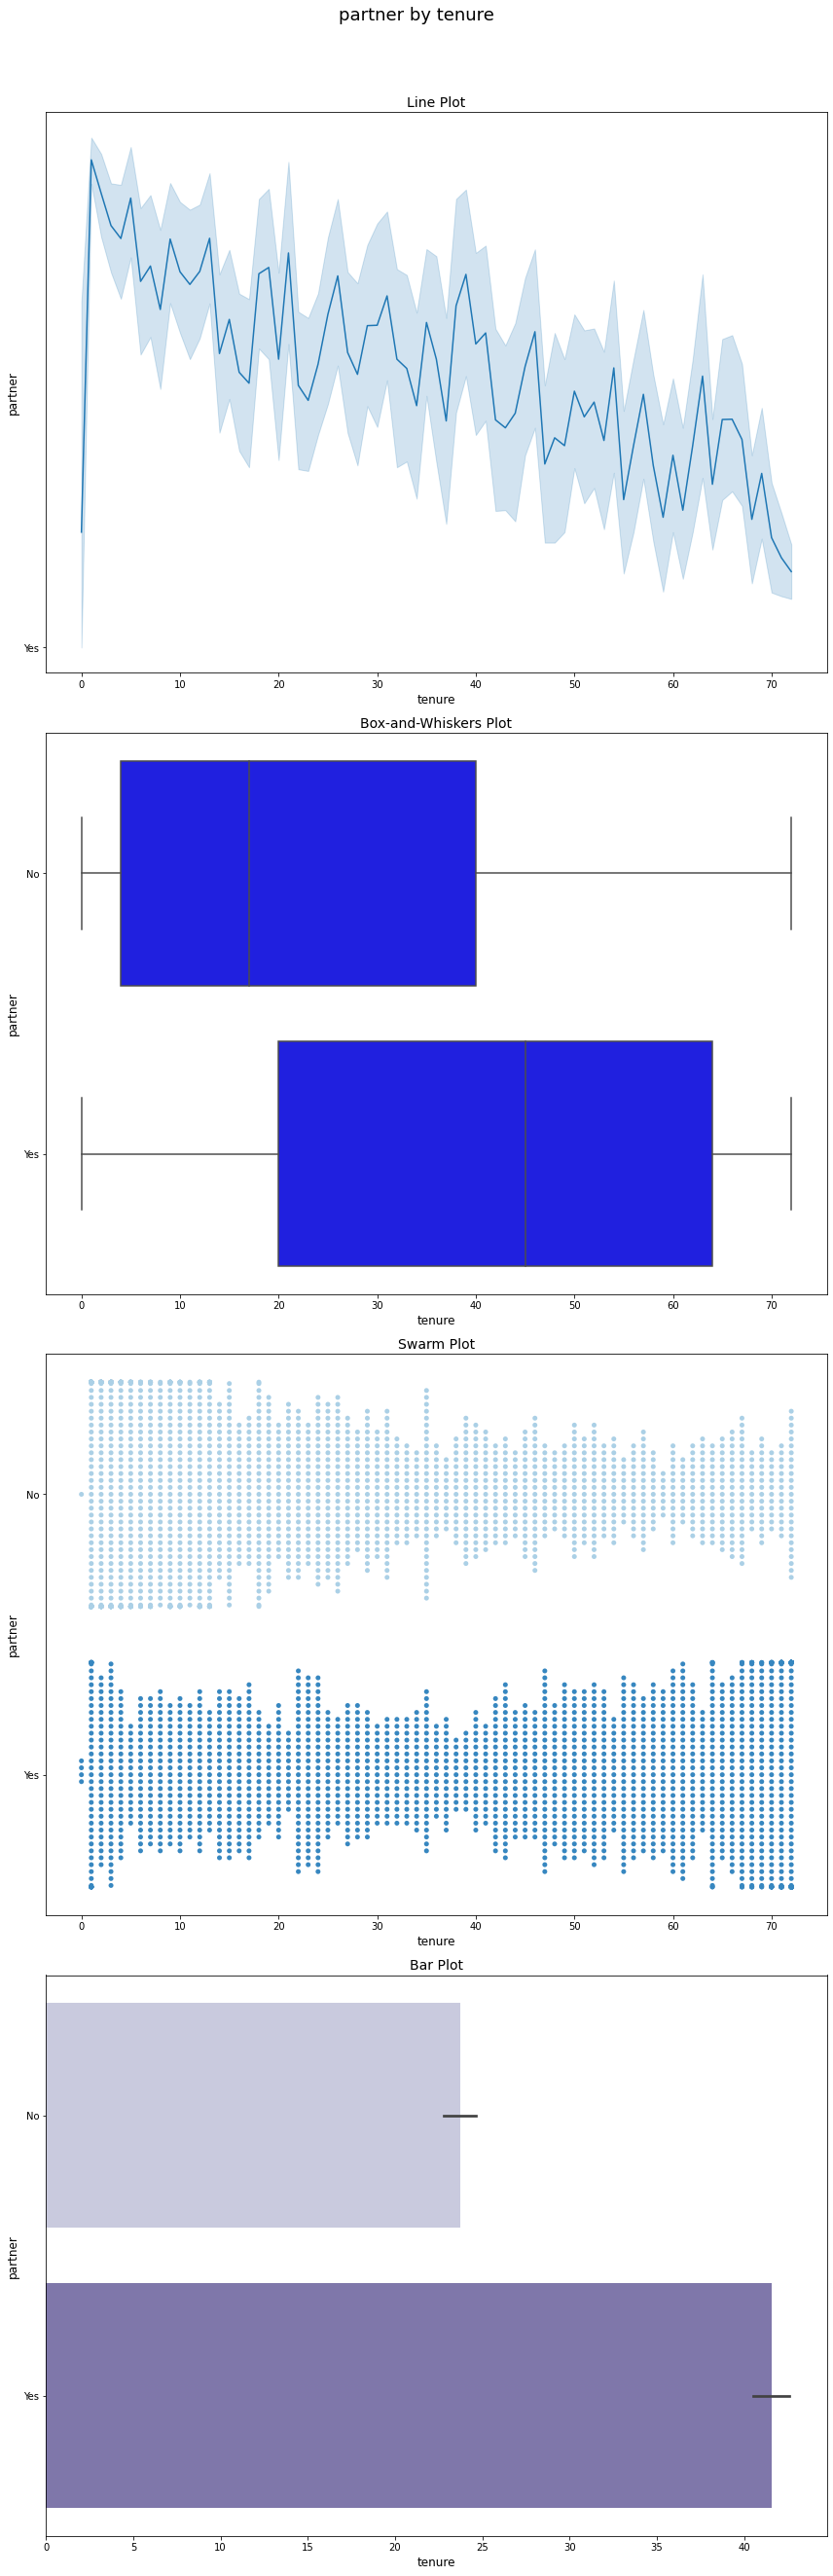

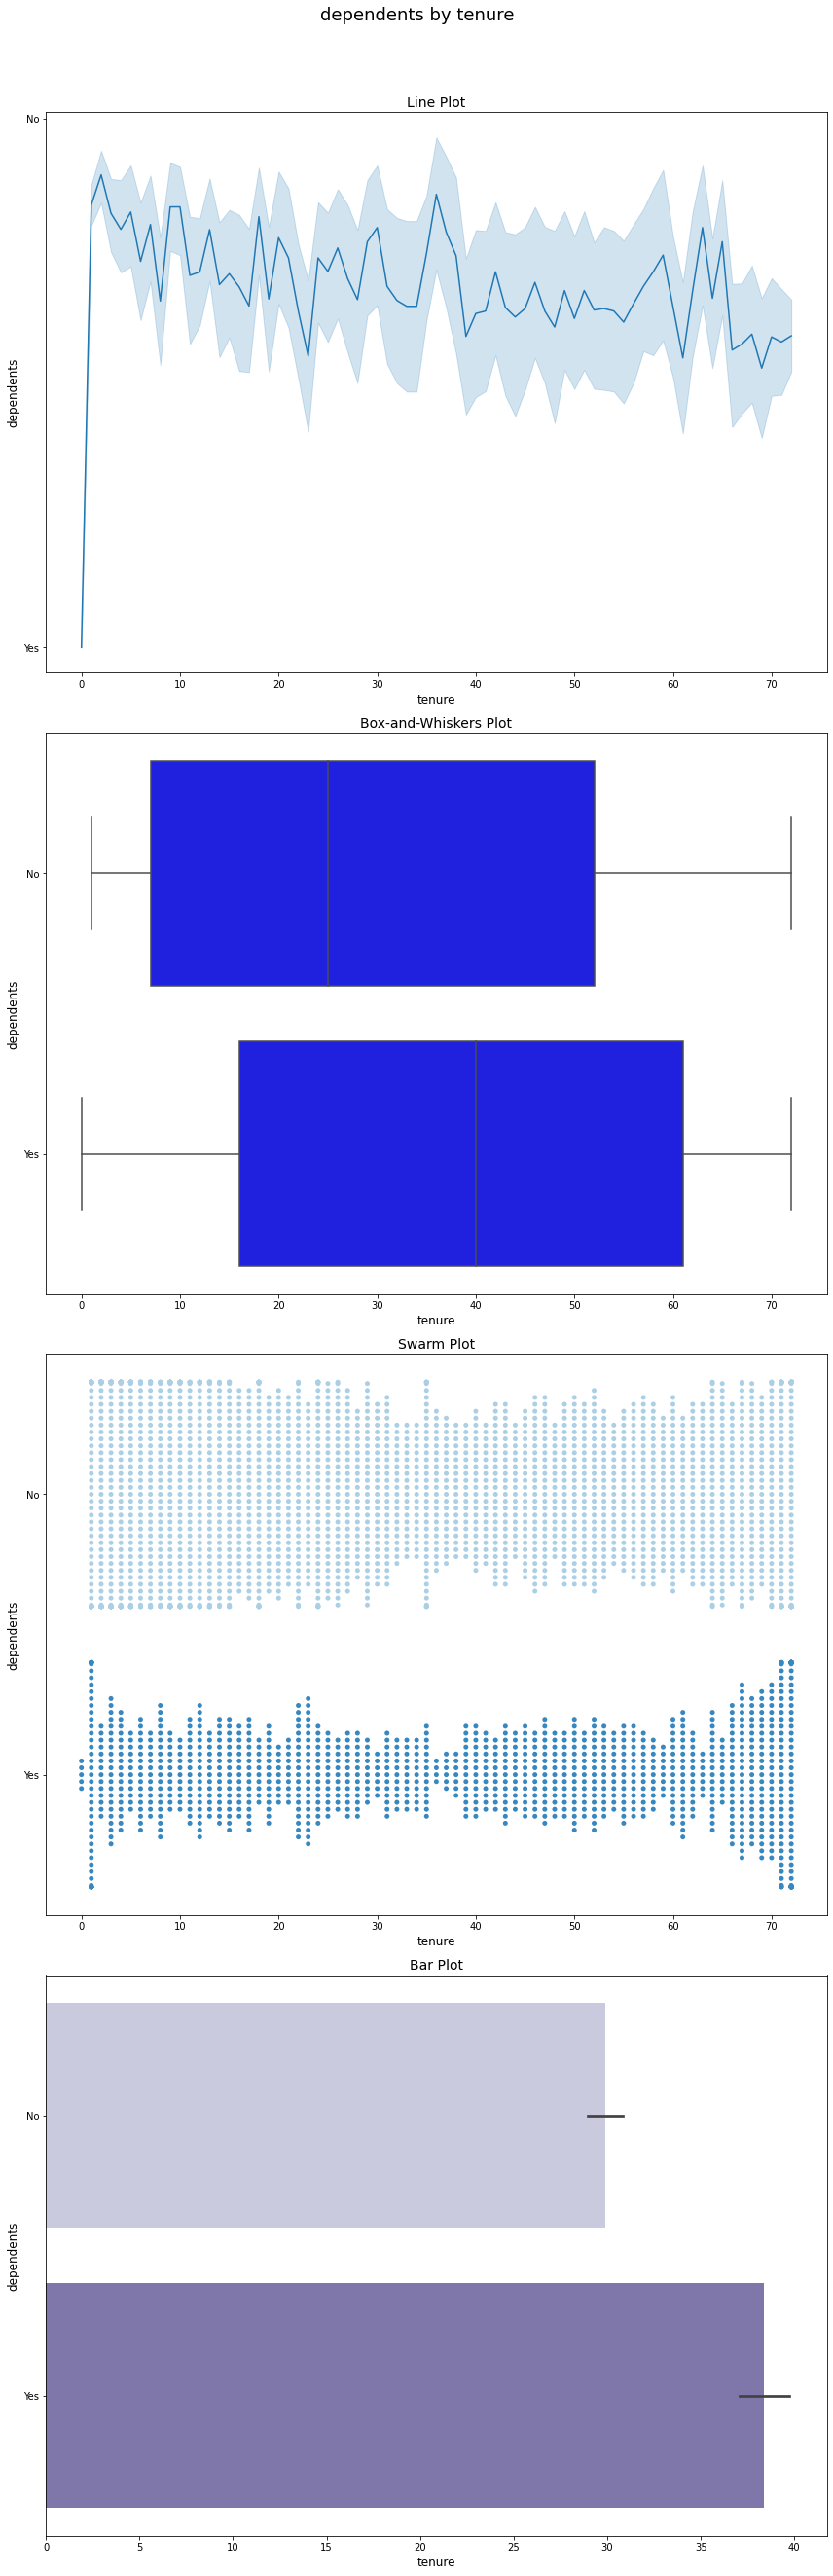

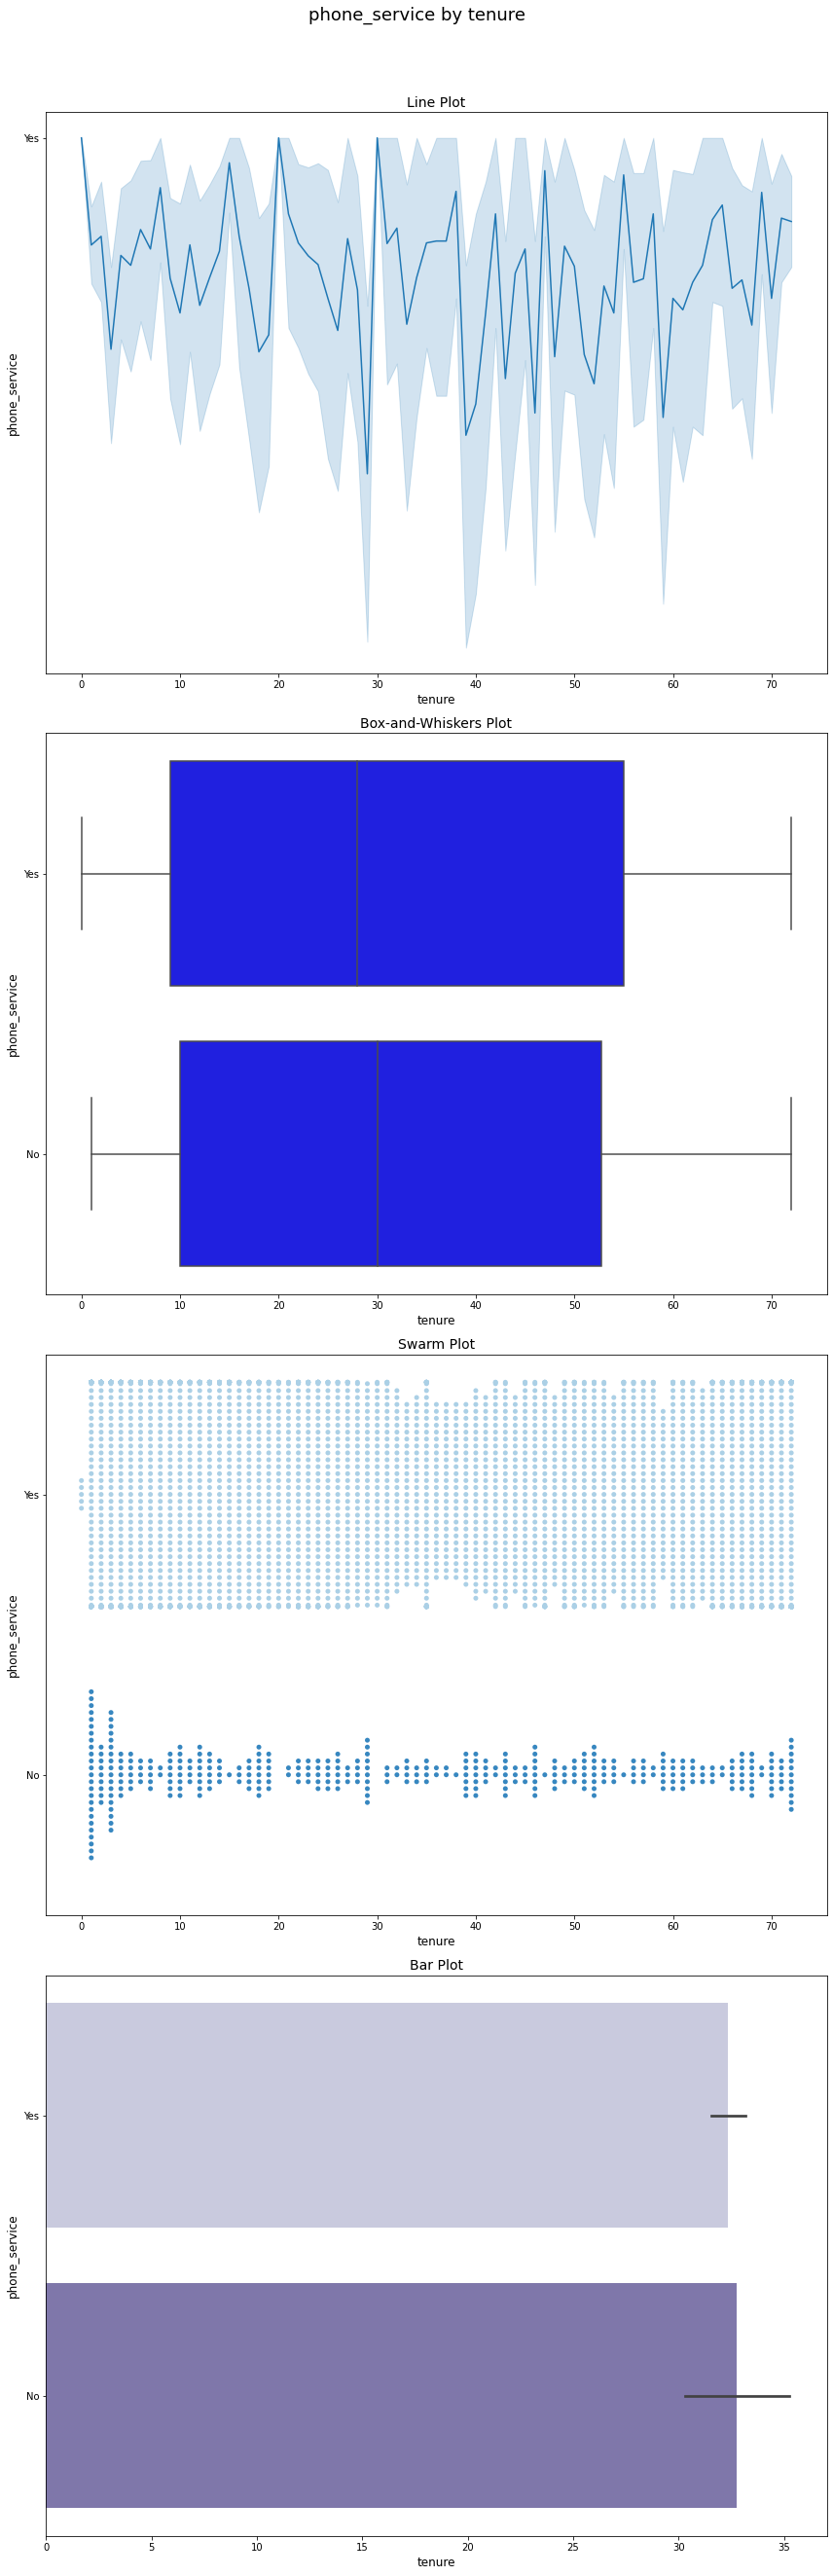

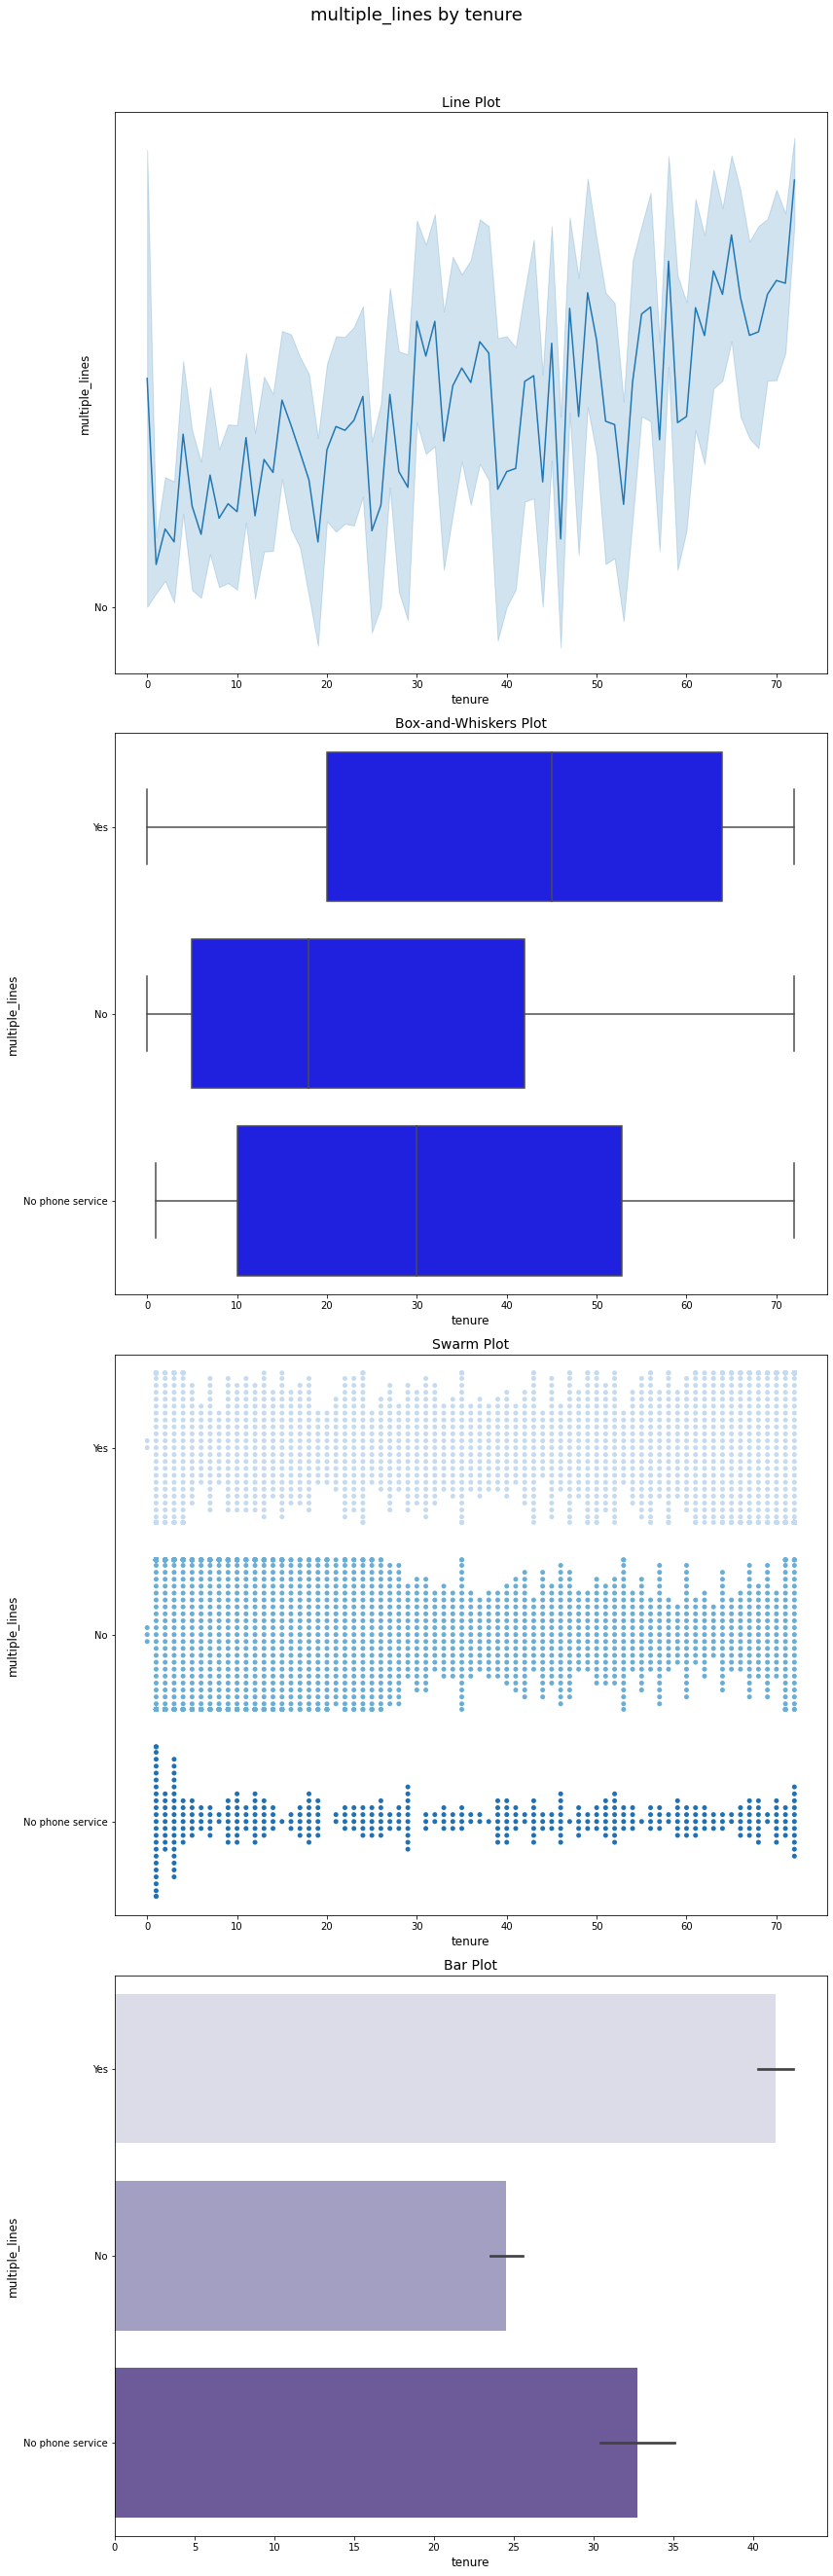

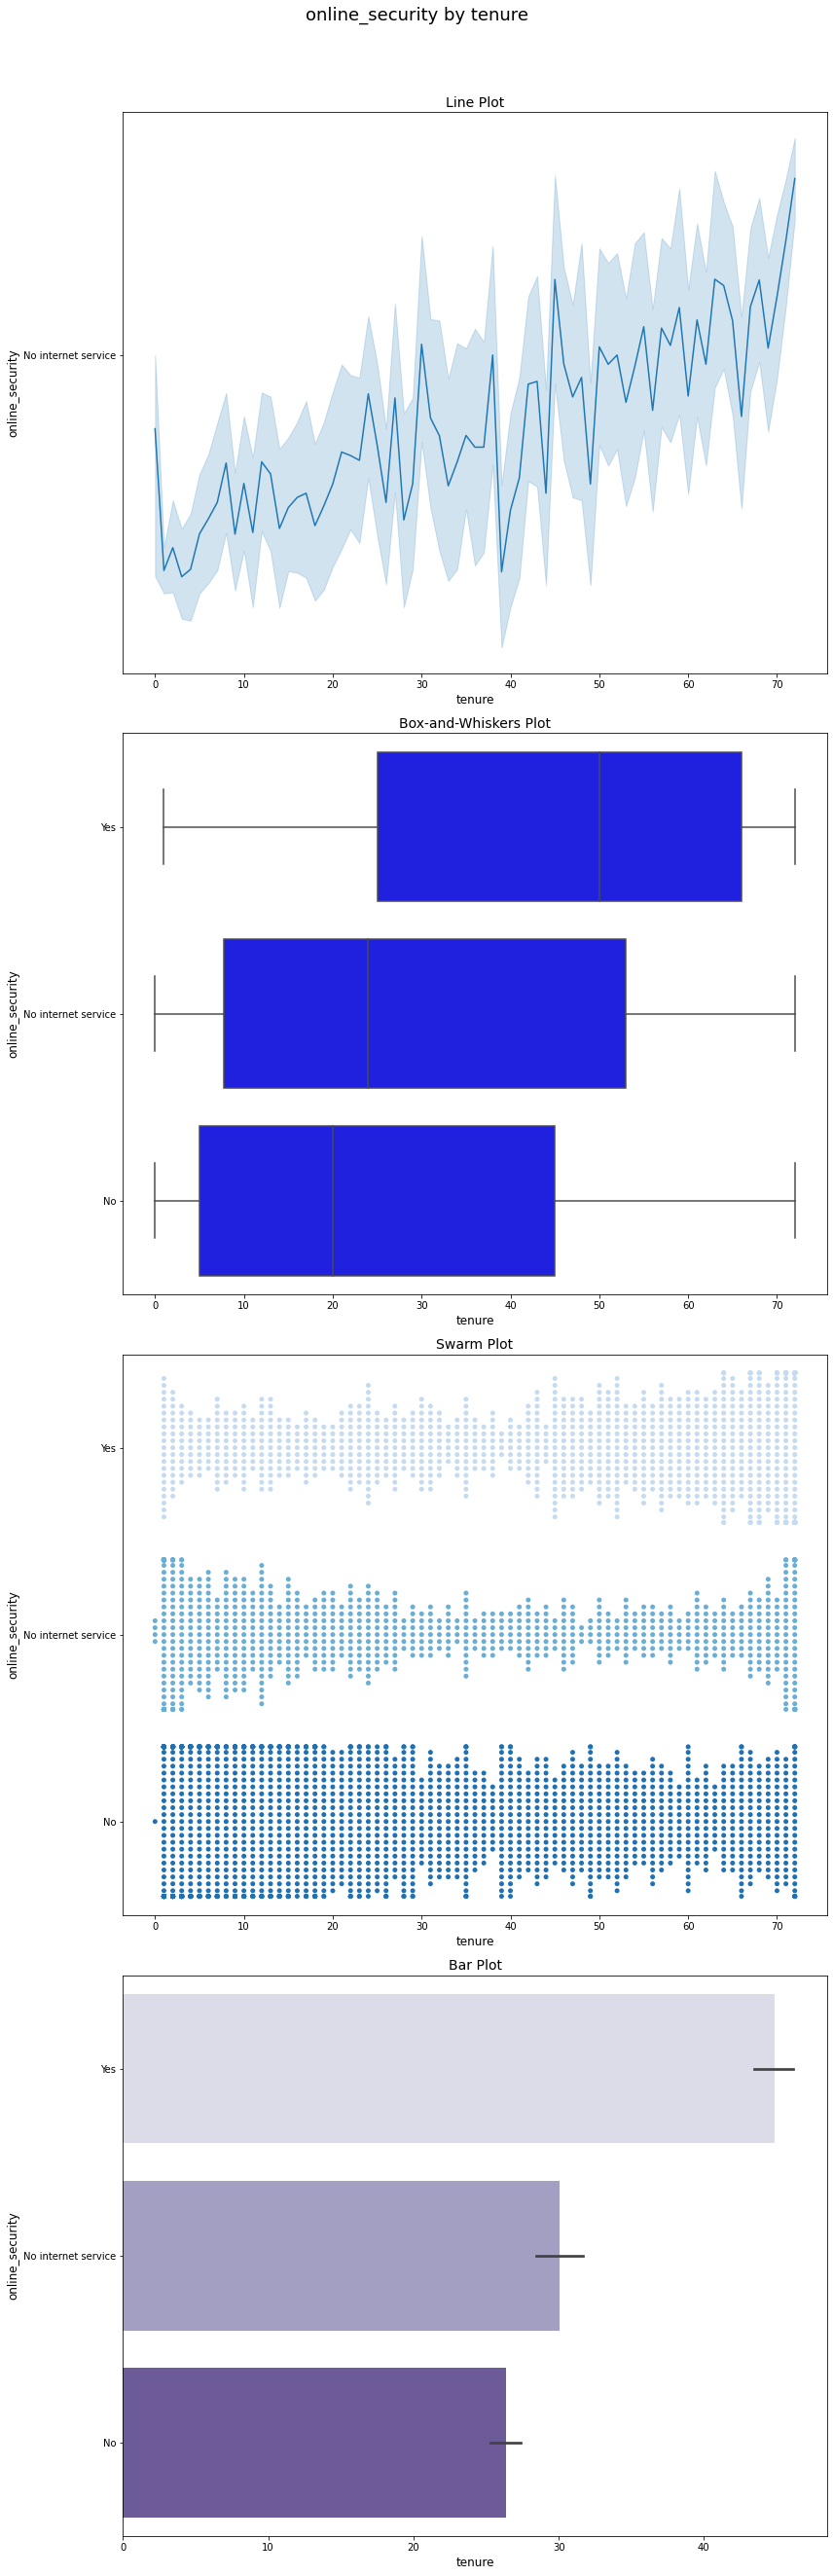

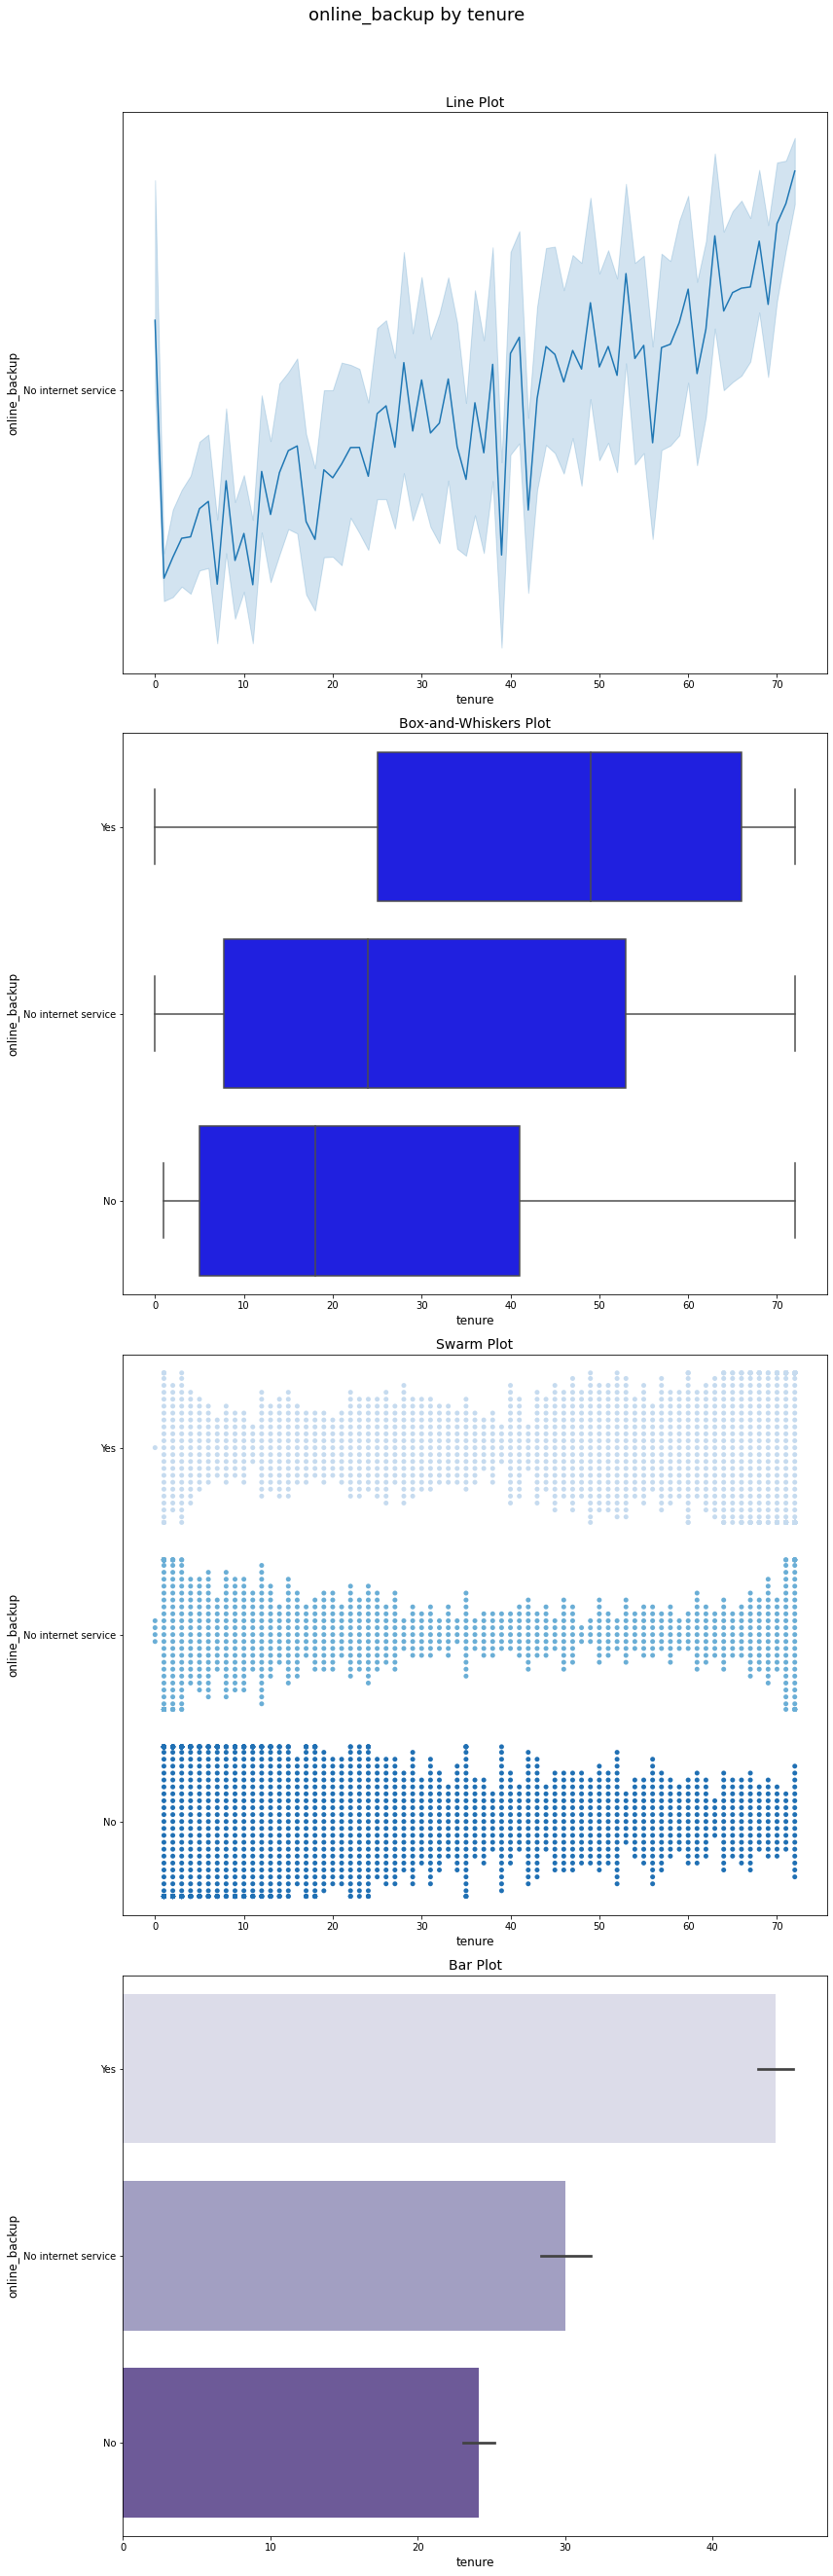

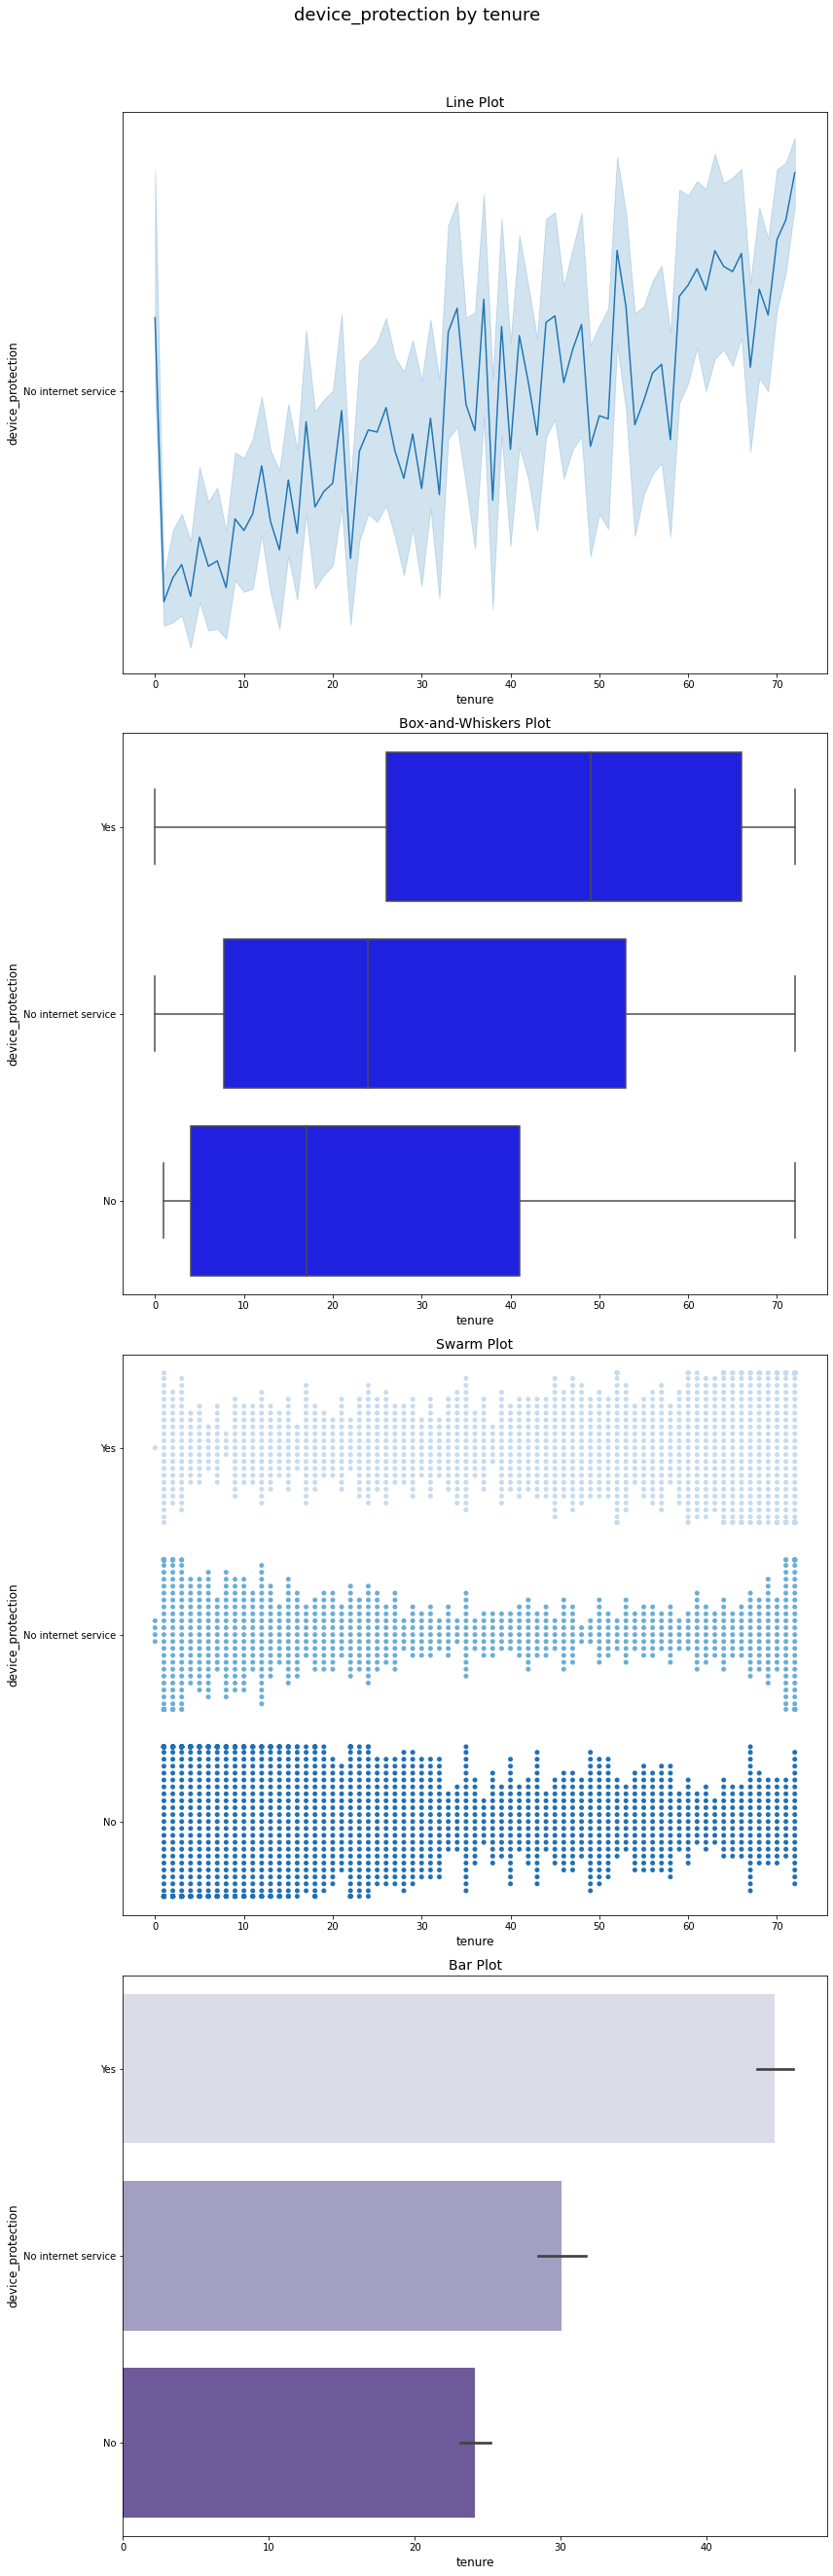

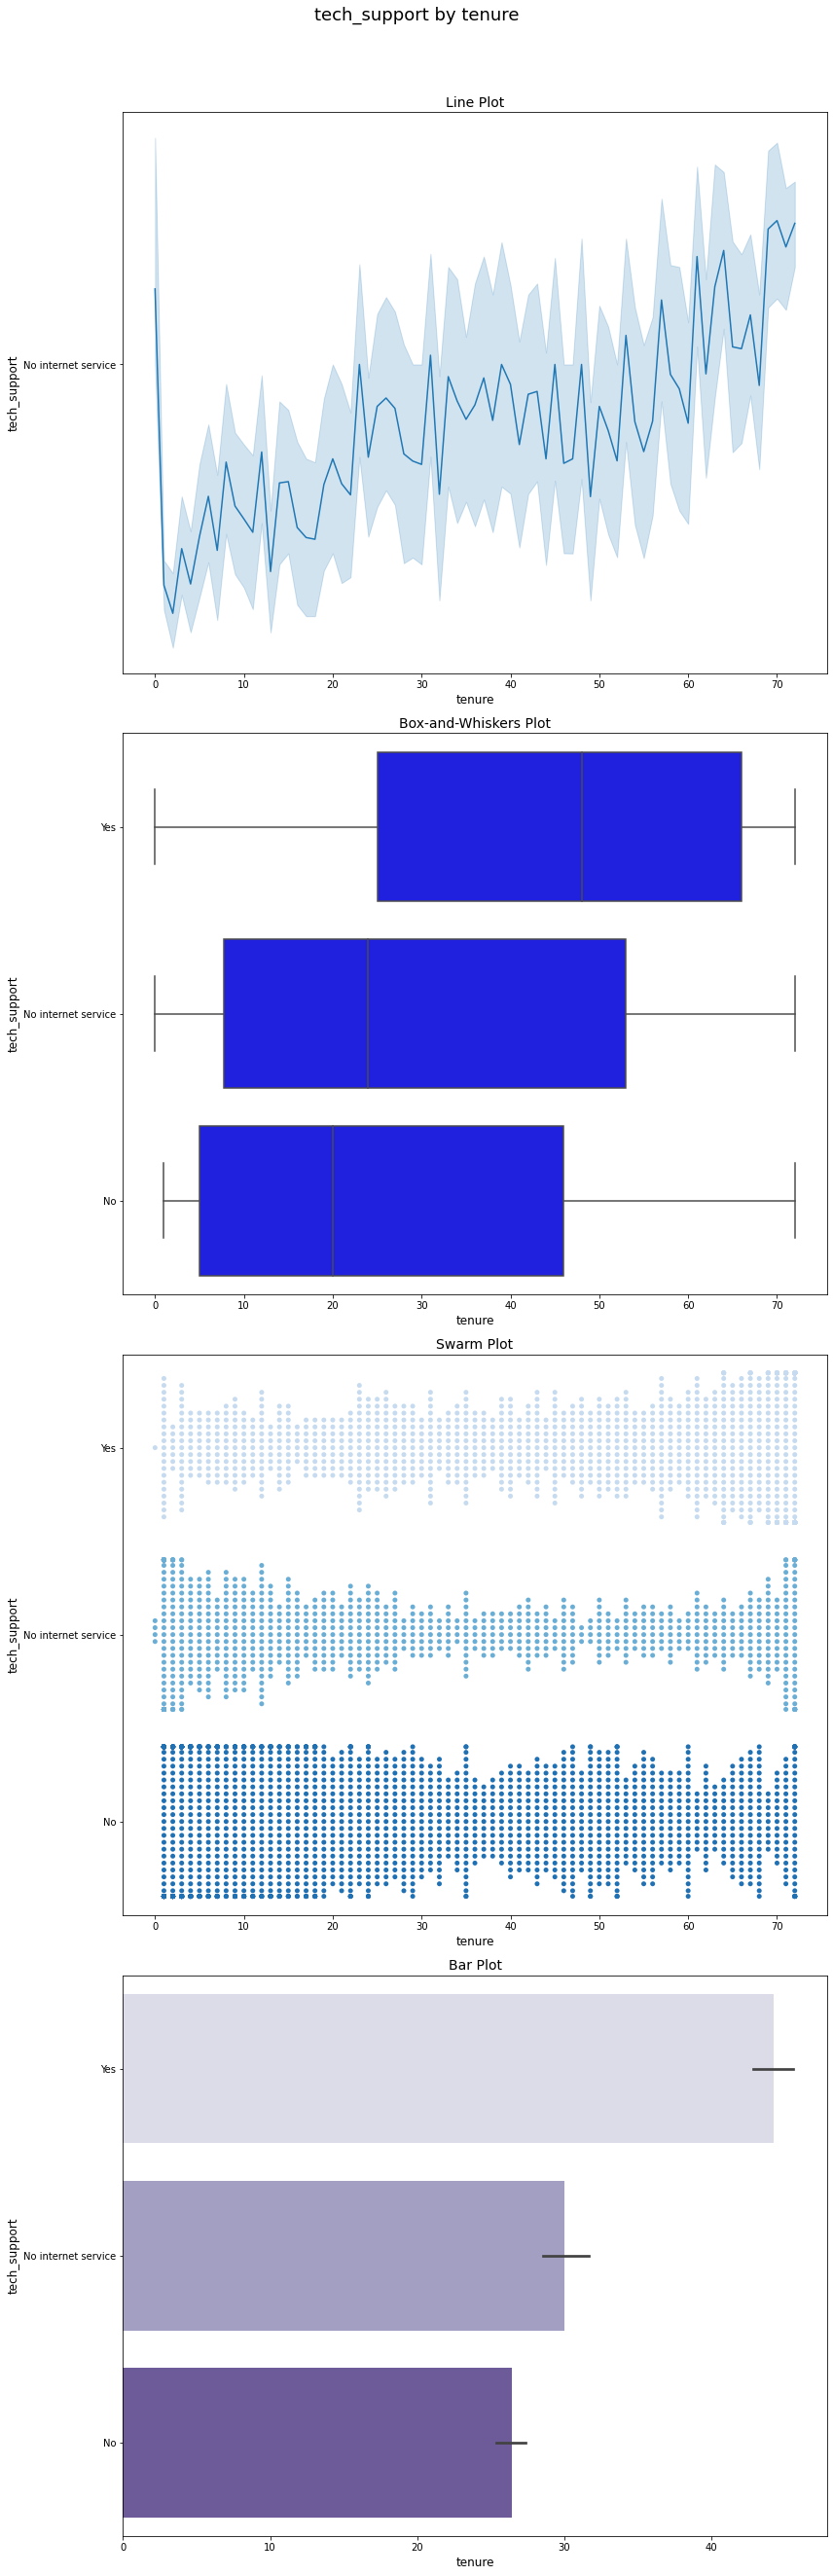

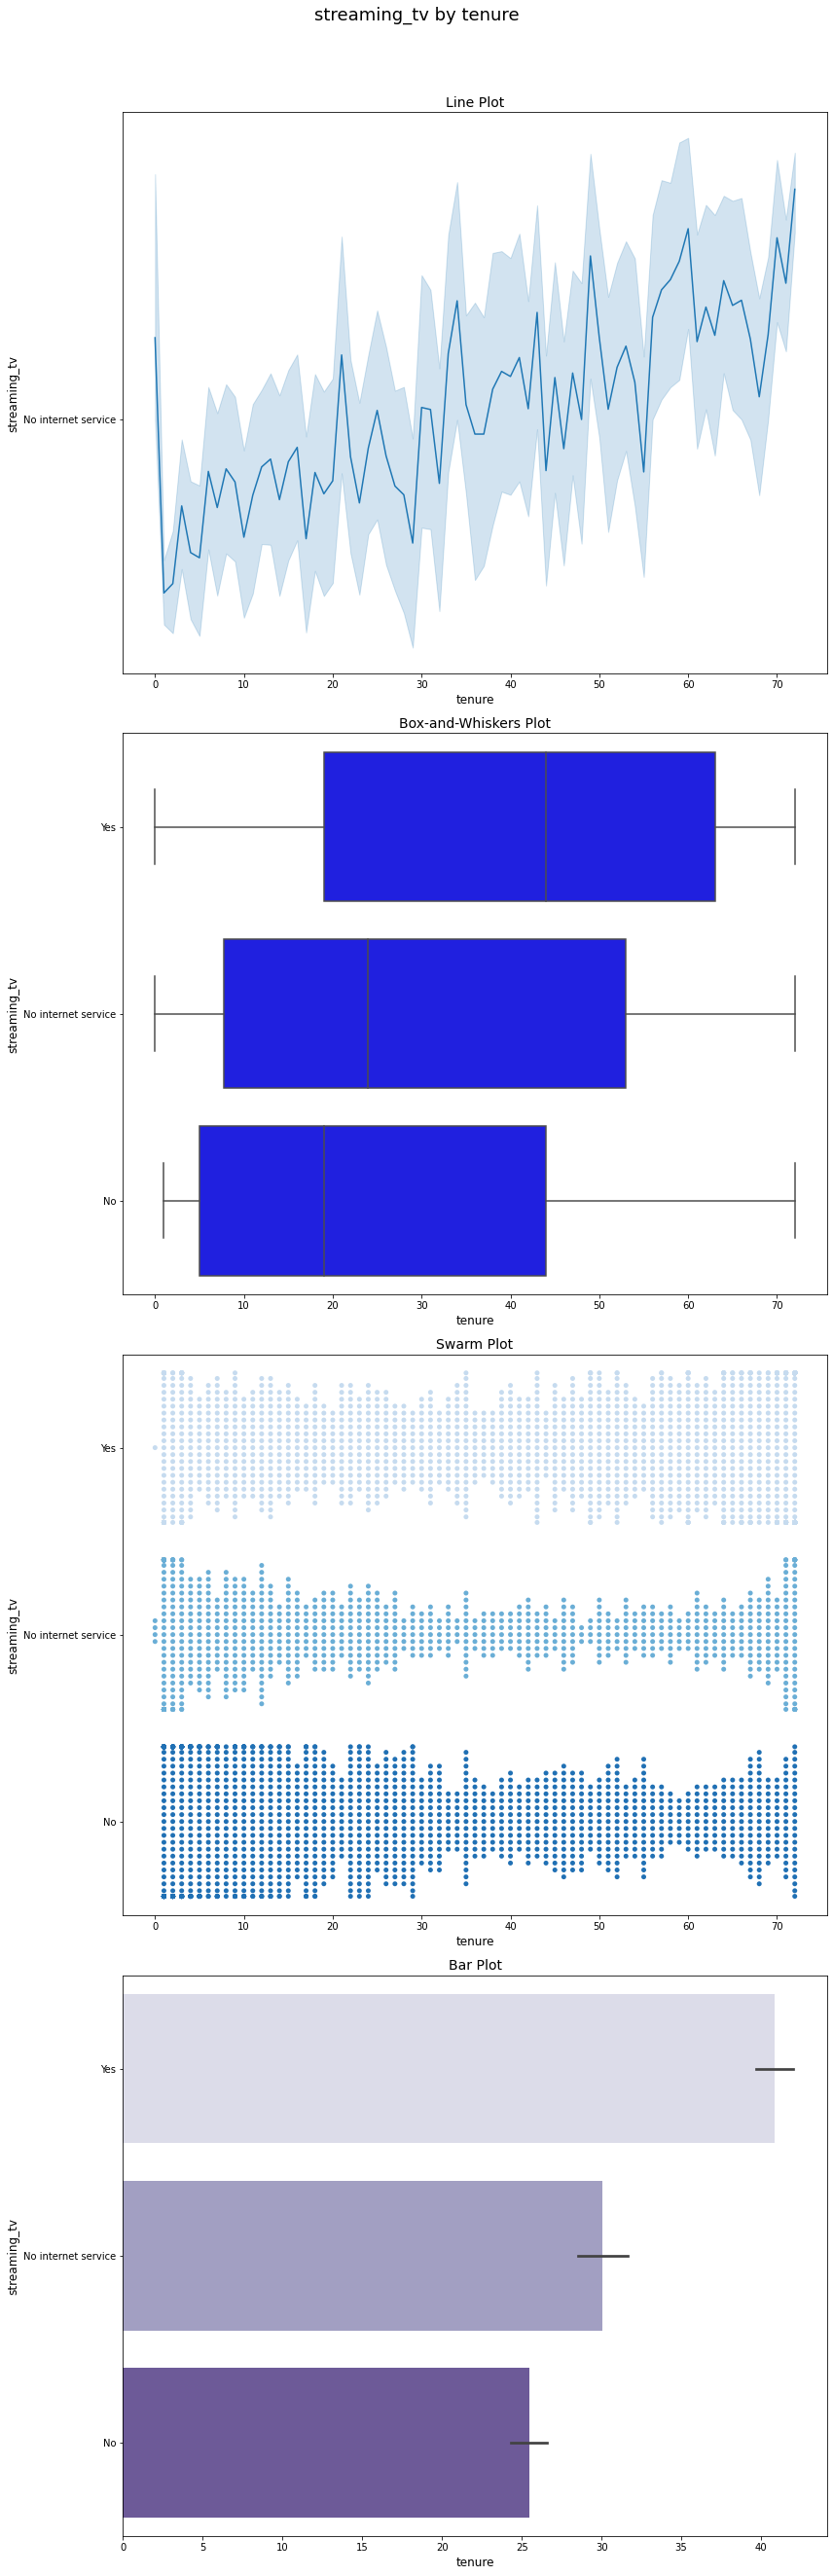

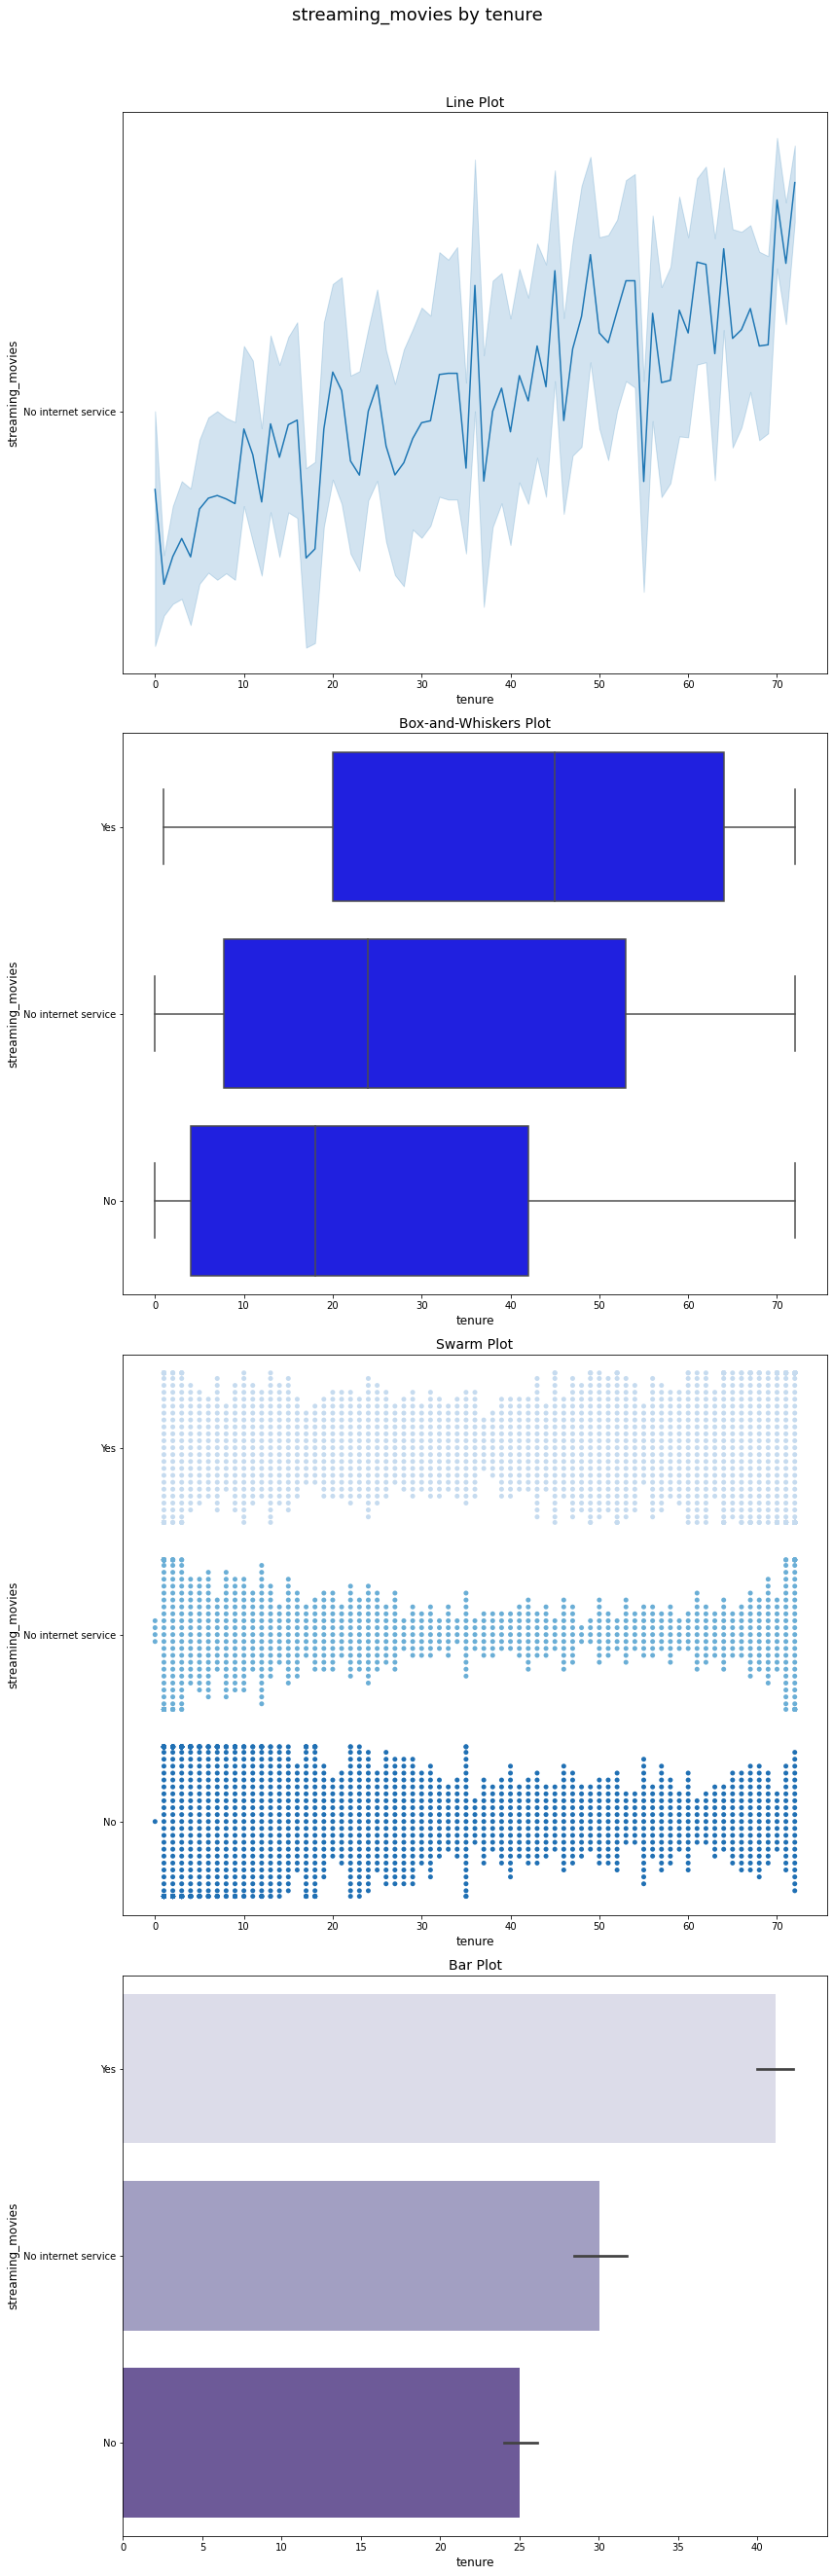

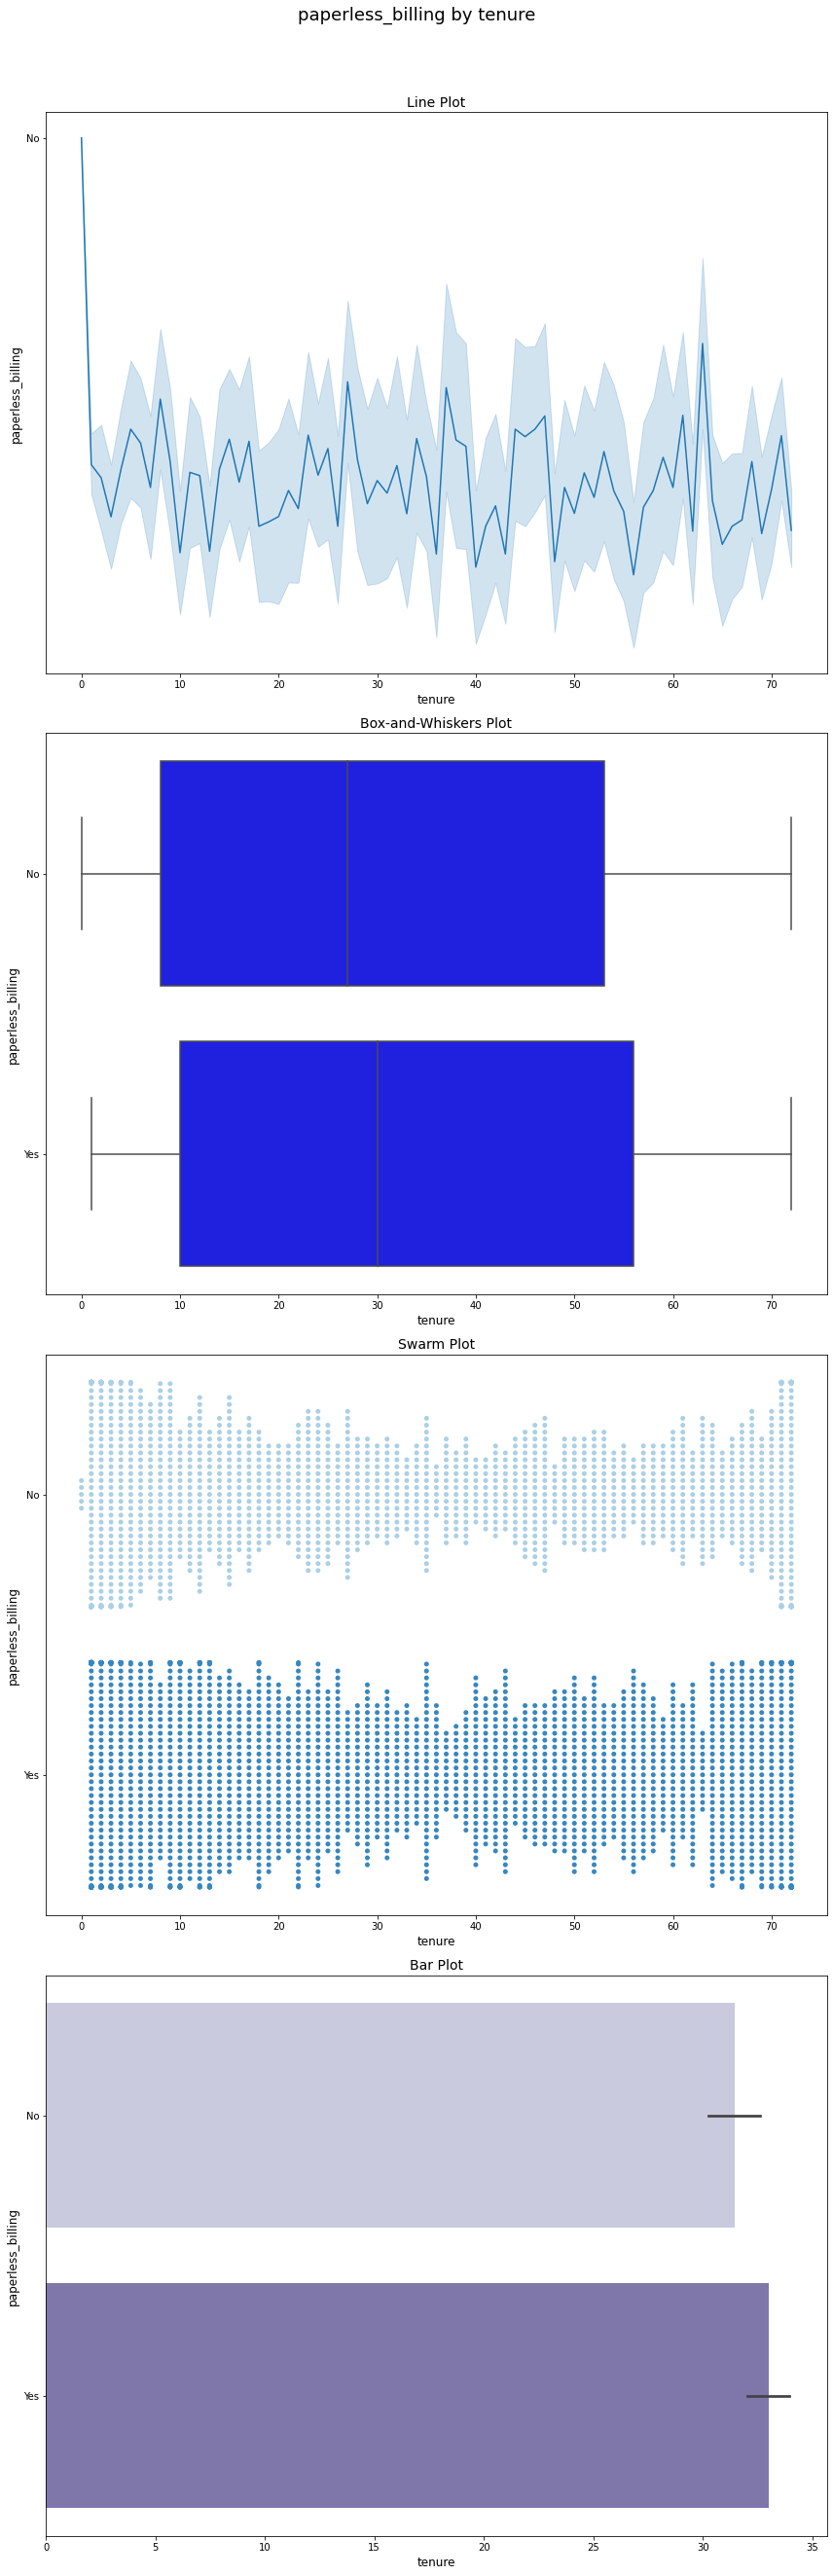

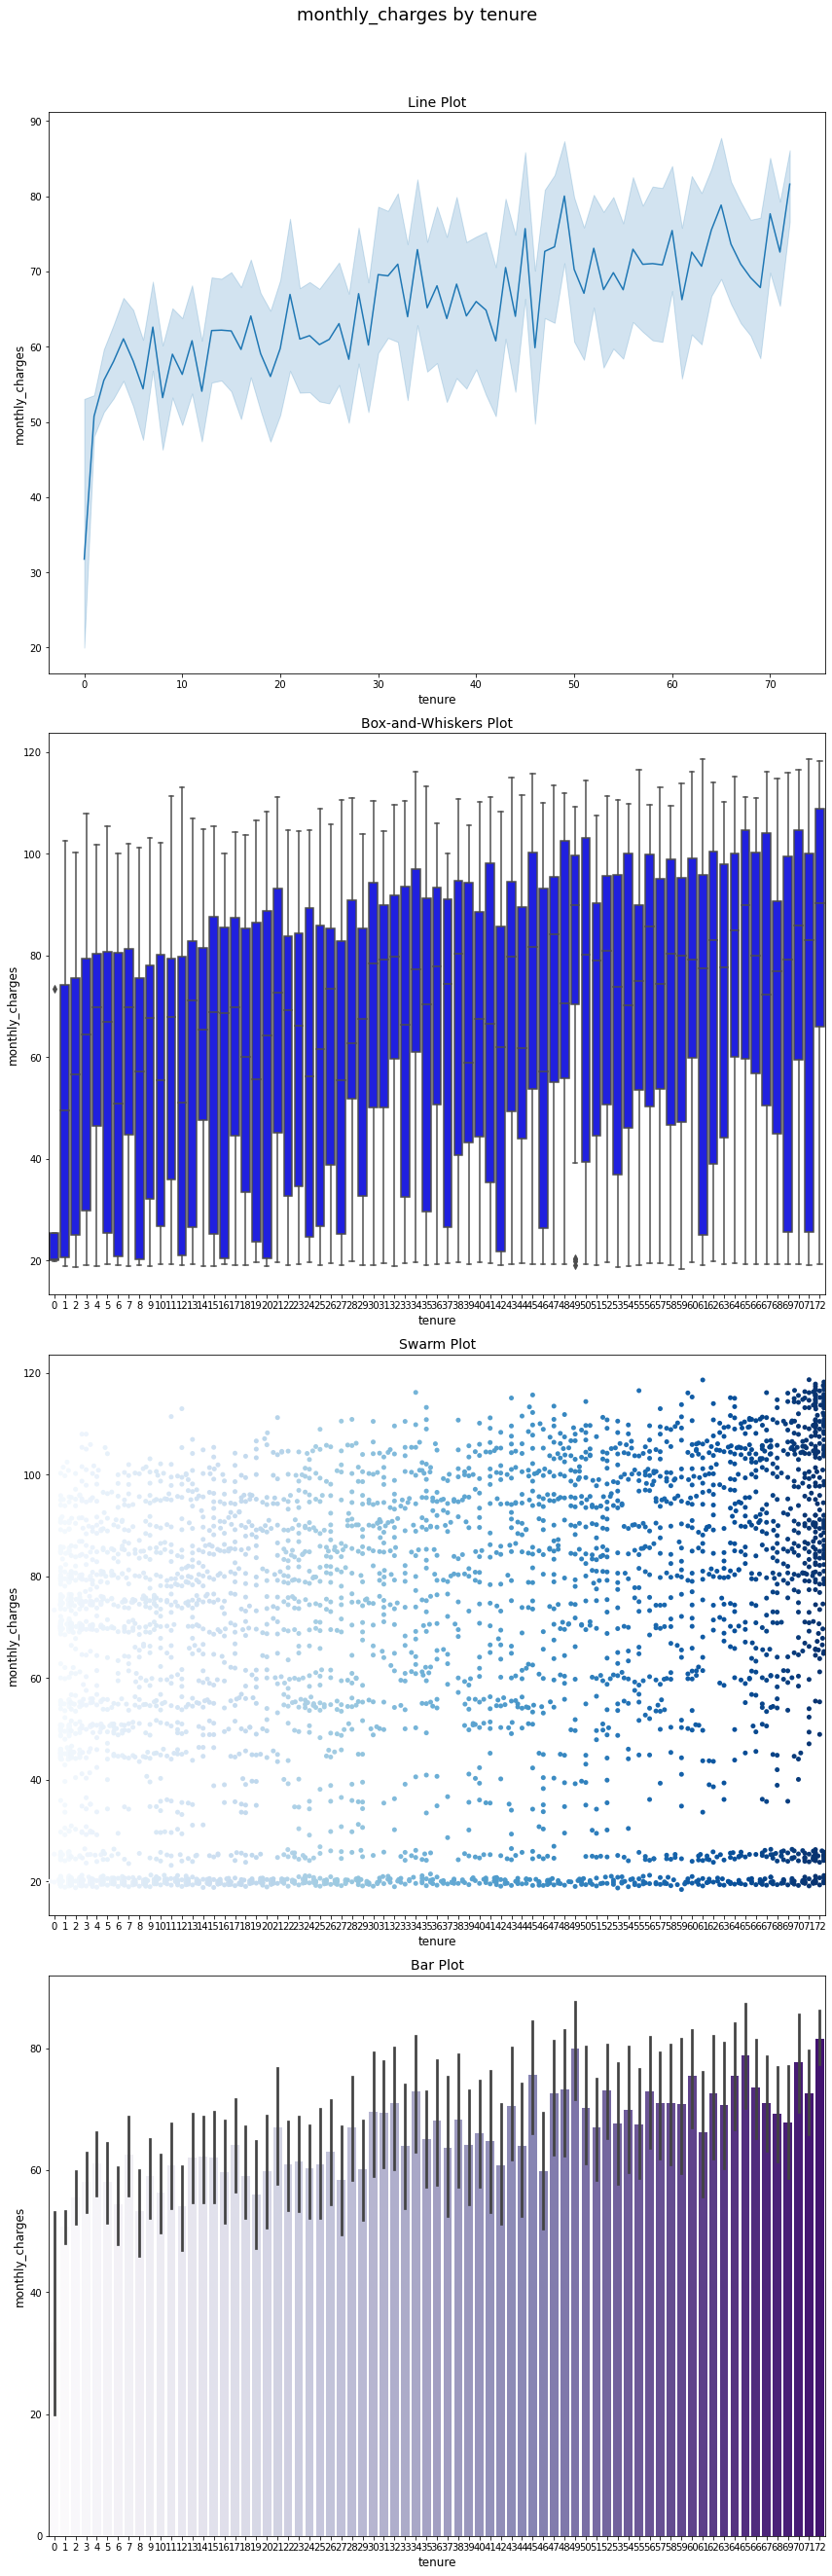

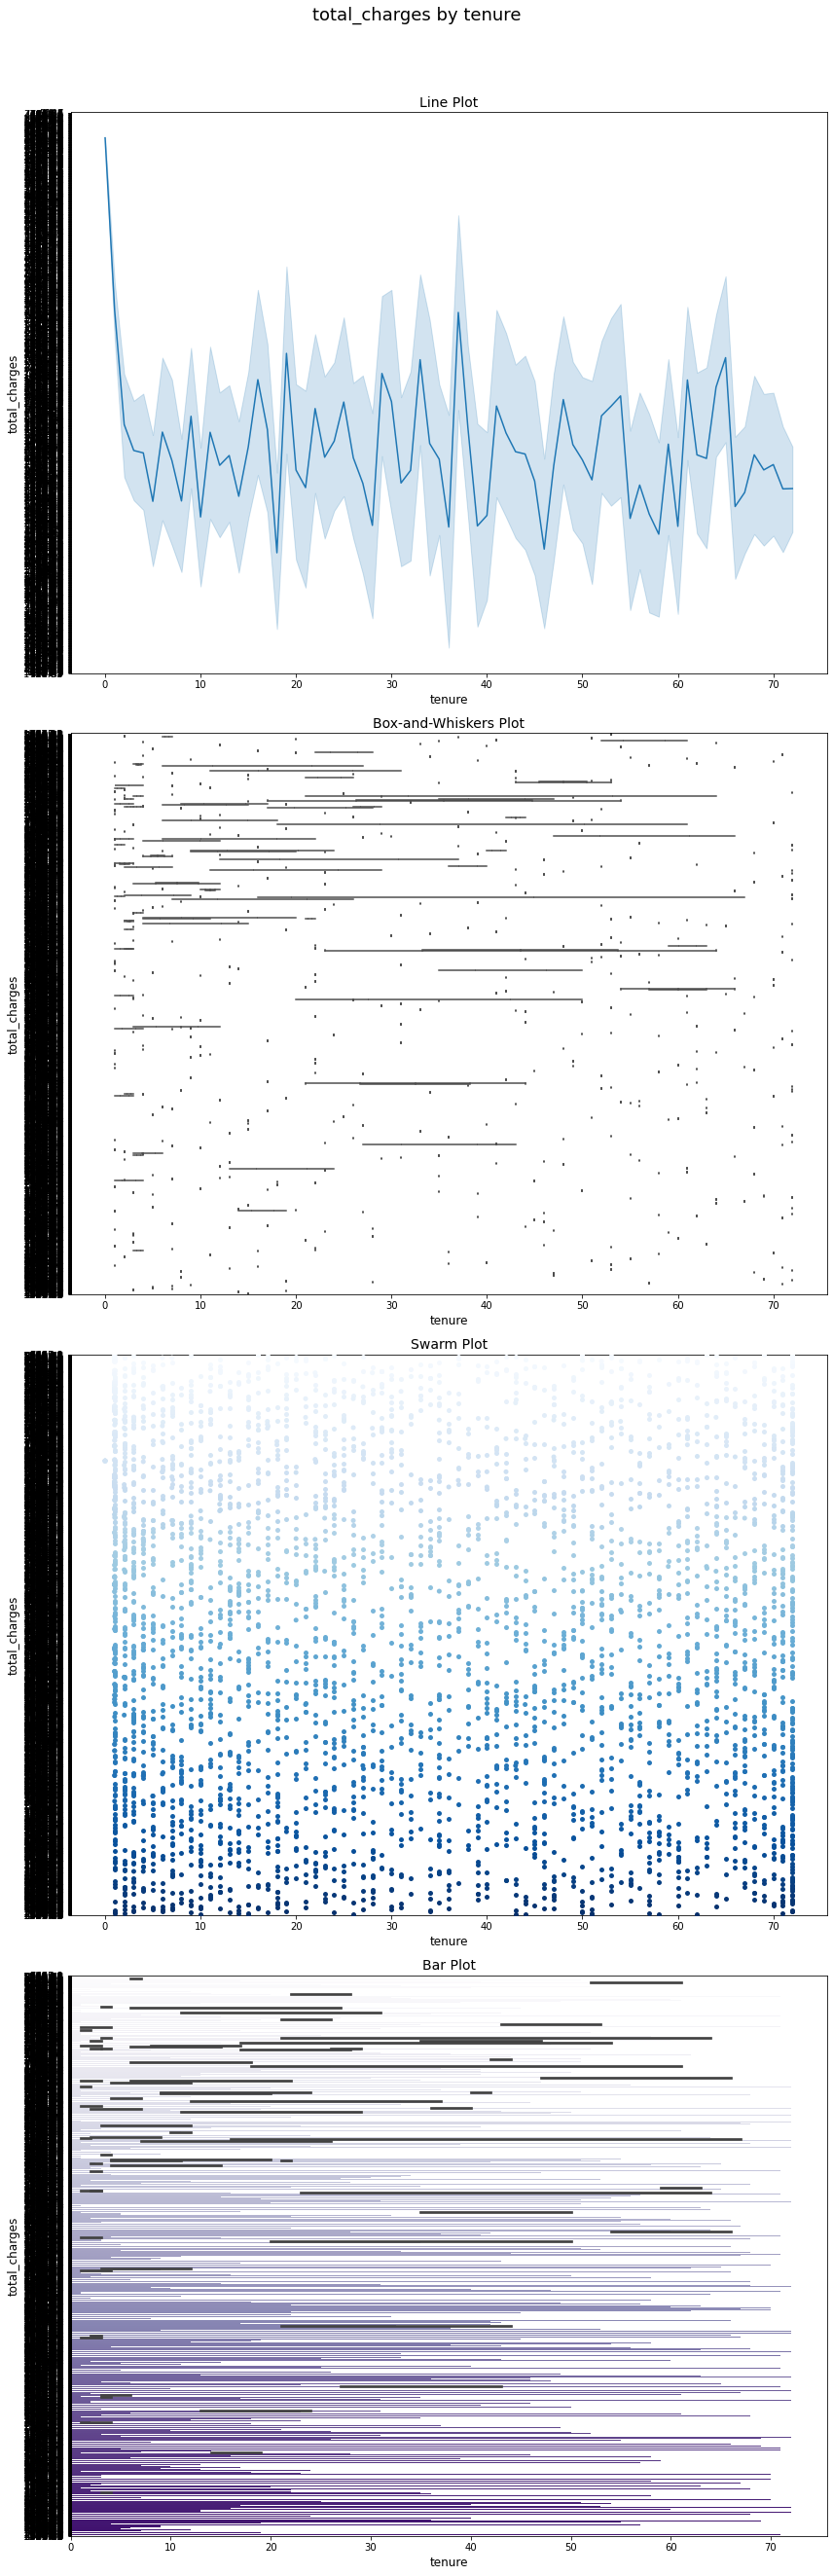

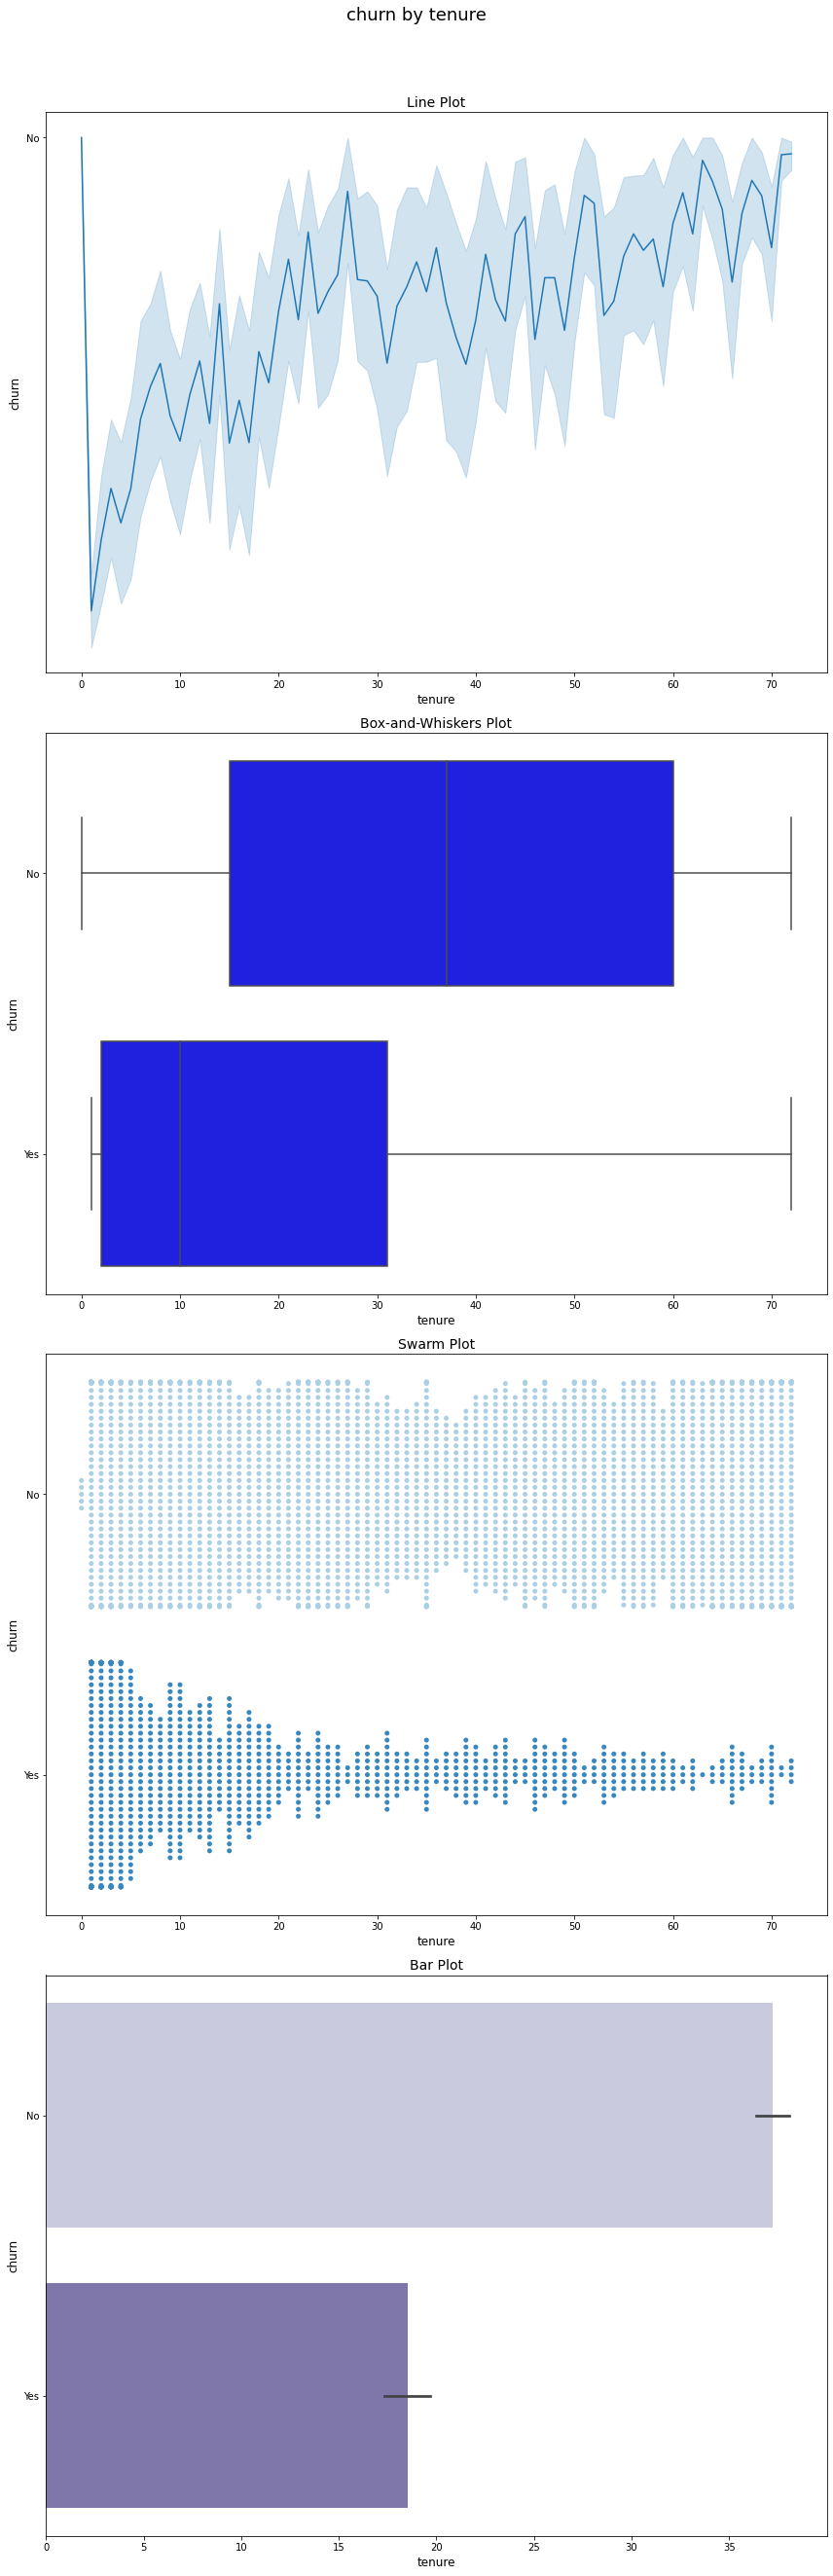

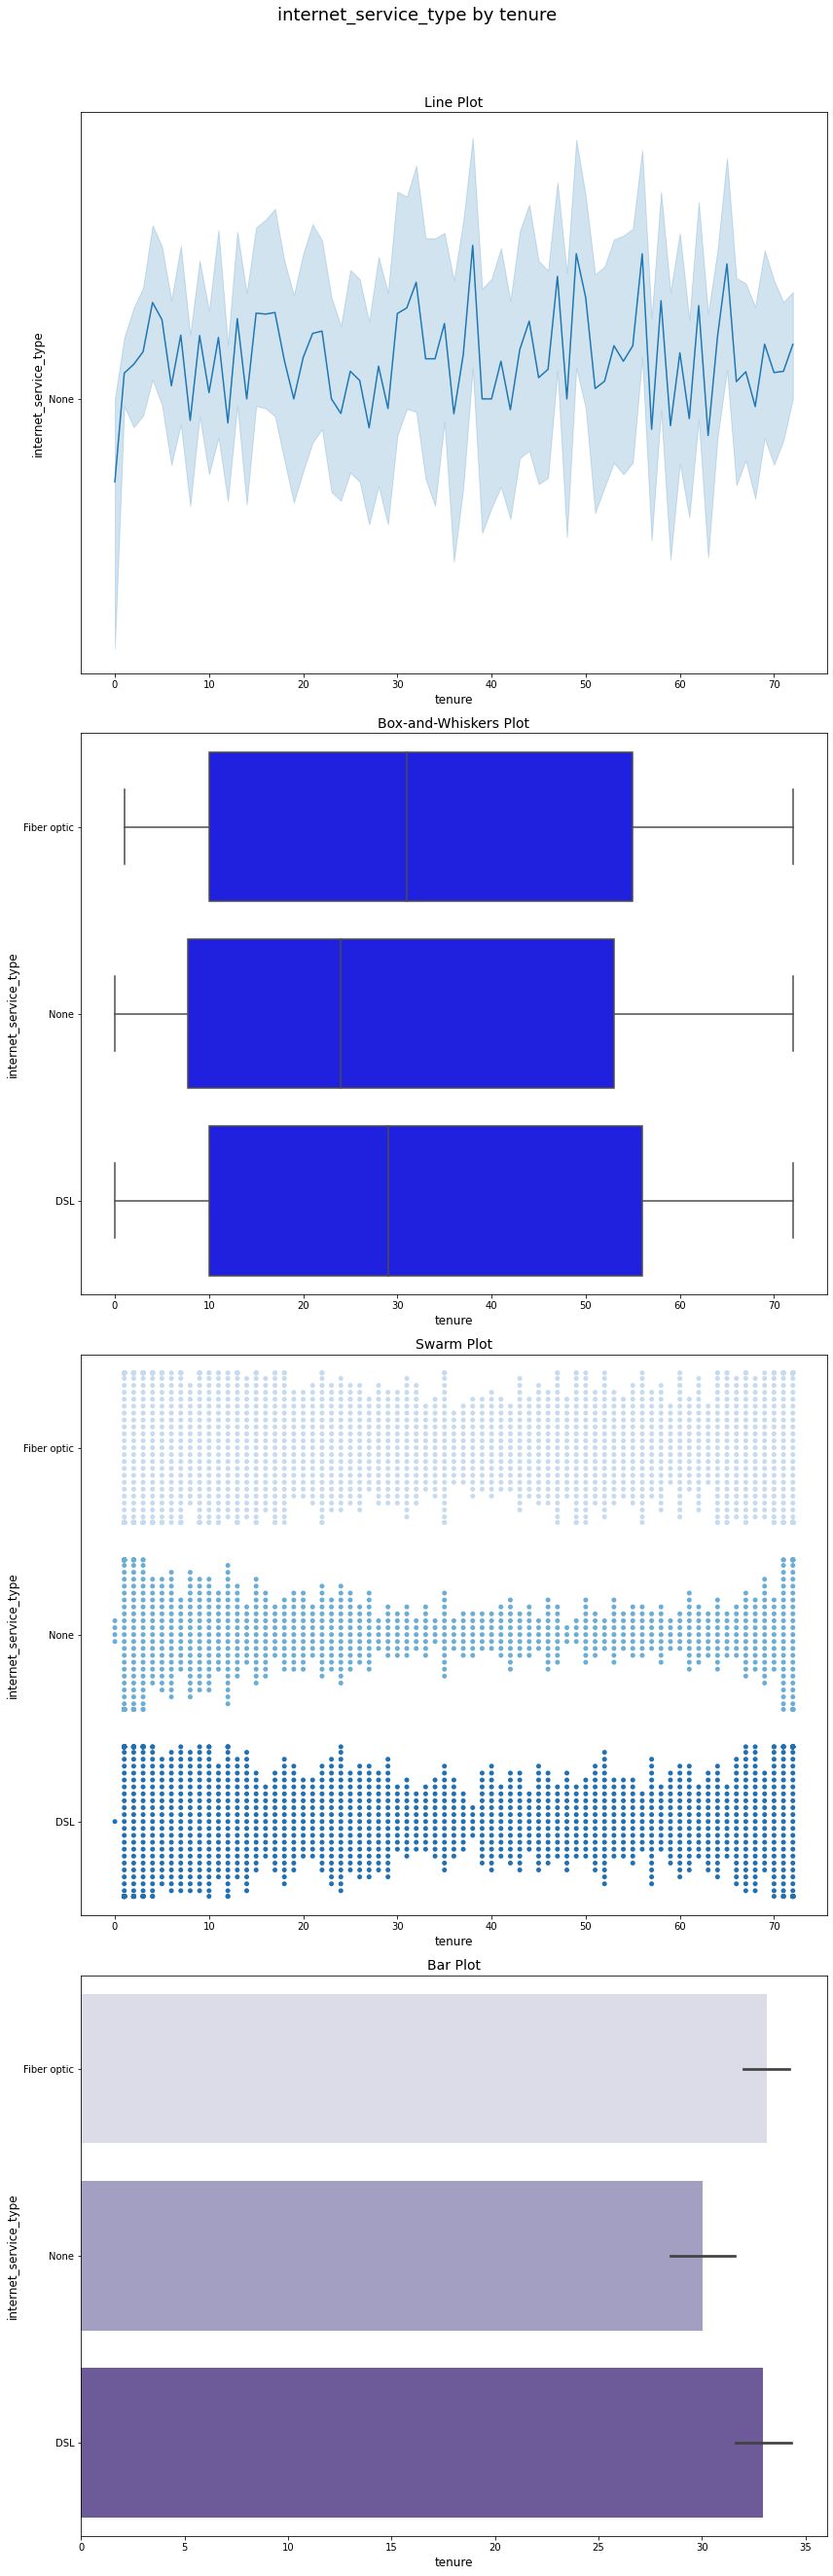

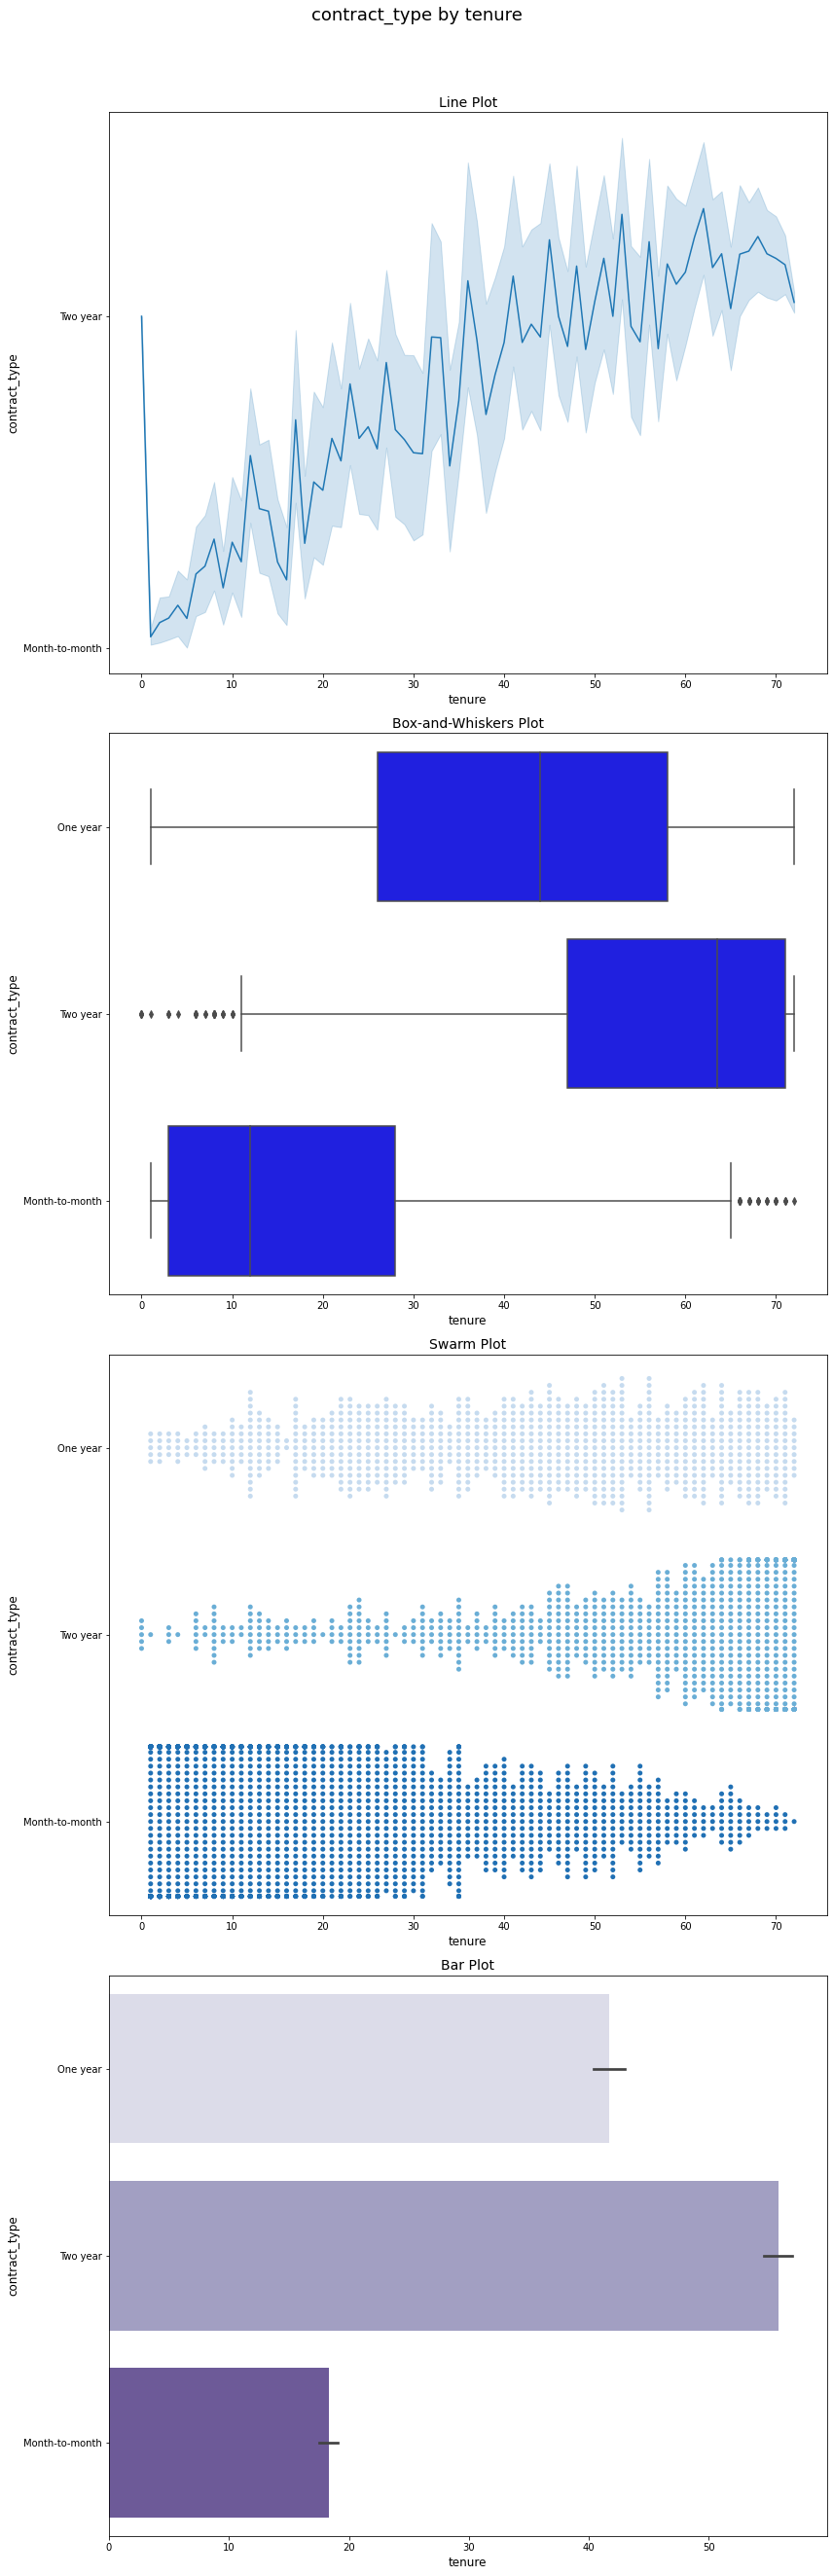

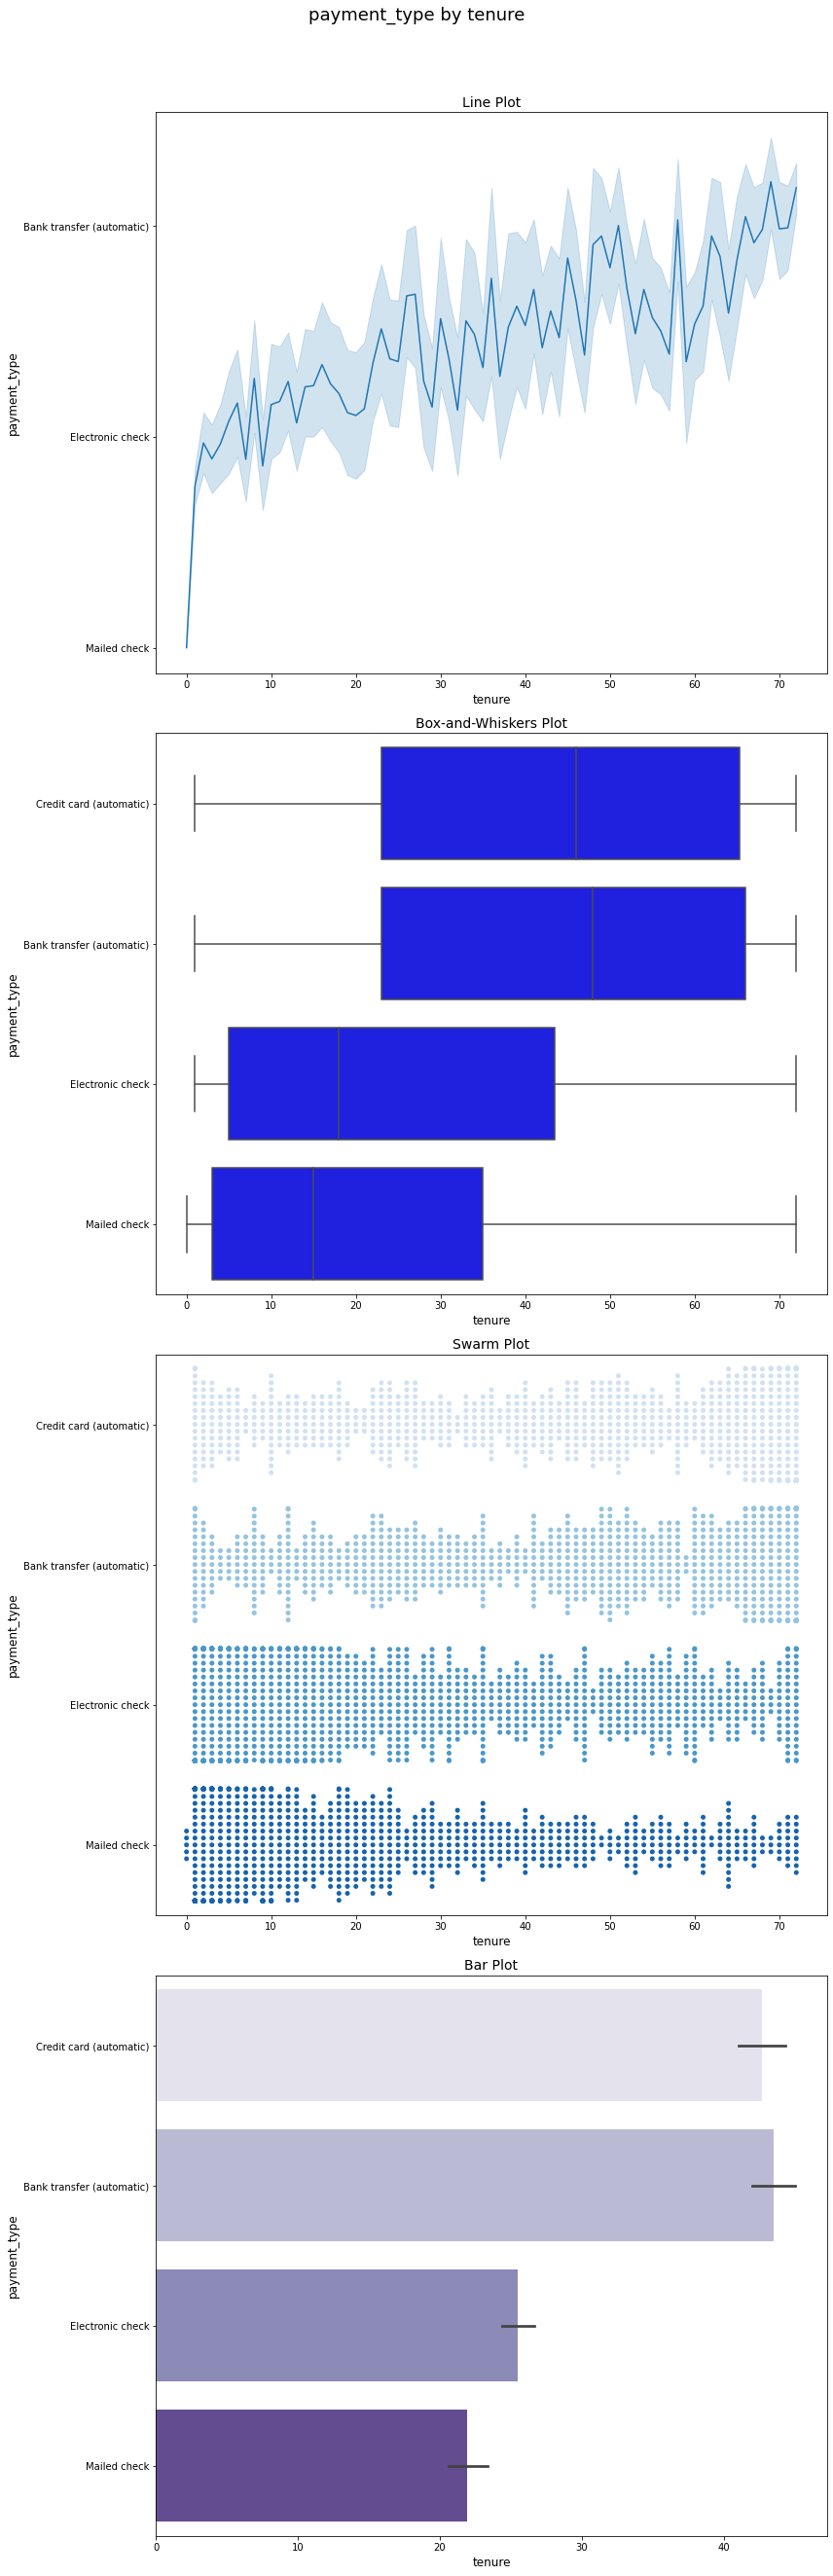

In [6]:
explore.plot_categorical_and_continuous_vars(['tenure'], \
                    train.drop(columns=['customer_id', 'tenure']).columns,\
                    train, descriptive = None)

## 4. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

 ^ Done

## 5. Explore your dataset with any other visualizations you think will be helpful.

TypeError: can't multiply sequence by non-int of type 'float'

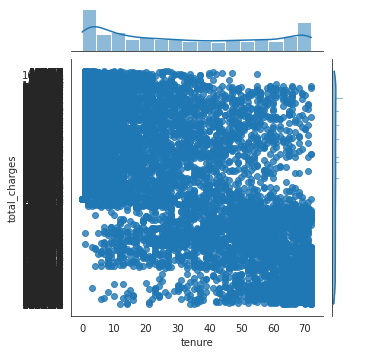

In [8]:
# c. Compute pearson's correlation coefficient and print it's value in the
#    sentence "Pearson's R is ____ with a significance p-value of ____"
columns = ['tenure', 'monthly_charges']
for col in columns:
    with sns.axes_style('white'):
        j = sns.jointplot(col, "total_charges", data=df, kind='reg', height=5);
        j.annotate(stats.pearsonr)
        plt.show()

## 6. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.